In [541]:
%pip install -U  --upgrade pip --quiet 
%pip install transformers --quiet
%pip install pandas --quiet
%pip install torch --quiet
%pip install sklearn --quiet
%pip install skforecast --quiet
%pip install numpy --quiet
%pip install seaborn --quiet
%pip install matplotlib --quiet
%pip install openpyxl --quiet
%pip install statsmodels --quiet

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [548]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression


In [424]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [425]:
df = pd.read_excel("data/Volve/Volve production data.xlsx")
df.head()

DATEPRD WELL_BORE_CODE  NPD_WELL_BORE_CODE NPD_WELL_BORE_NAME  NPD_FIELD_CODE NPD_FIELD_NAME  NPD_FACILITY_CODE NPD_FACILITY_NAME  ON_STREAM_HRS  AVG_DOWNHOLE_PRESSURE  AVG_DOWNHOLE_TEMPERATURE  AVG_DP_TUBING  AVG_ANNULUS_PRESS  AVG_CHOKE_SIZE_P AVG_CHOKE_UOM  AVG_WHP_P  AVG_WHT_P  DP_CHOKE_SIZE  BORE_OIL_VOL  BORE_GAS_VOL  BORE_WAT_VOL  BORE_WI_VOL   FLOW_KIND WELL_TYPE
0 2014-04-07  NO 15/9-F-1 C                7405         15/9-F-1 C         3420717          VOLVE             369304    MÆRSK INSPIRER            0.0                0.00000                   0.00000        0.00000                0.0          0.000000             %    0.00000    0.00000        0.00000           0.0           0.0           0.0          NaN  production        WI
1 2014-04-08  NO 15/9-F-1 C                7405         15/9-F-1 C         3420717          VOLVE             369304    MÆRSK INSPIRER            0.0                    NaN                       NaN            NaN                0.0          1.003059             %    0.00000    0.00000        0.00000           0.0           0.0           0.0          NaN  production        OP
2 2014-04-09  NO 15/9-F-1 C                7405         15/9-F-1 C         3420717          VOLVE             369304    MÆRSK INSPIRER            0.0                    NaN                       NaN            NaN                0.0          0.979008             %    0.00000    0.00000        0.00000           0.0           0.0           0.0          NaN  production        OP
3 2014-04-10  NO 15/9-F-1 C                7405         15/9-F-1 C         3420717          VOLVE             369304    MÆRSK INSPIRER            0.0                    NaN                       NaN            NaN                0.0          0.545759             %    0.00000    0.00000        0.00000           0.0           0.0           0.0          NaN  production        OP
4 2014-04-11  NO 15/9-F-1 C                7405         15/9-F-1 C         3420717          VOLVE             369304    MÆRSK INSPIRER            0.0              310.37614                  96.87589      277.27826                0.0          1.215987             %   33.09788   10.47992       33.07195           0.0           0.0           0.0          NaN  production        OP

In [426]:
df.rename(columns={
    'DATEPRD': 'date',
    'NPD_WELL_BORE_CODE': 'well_name',
    'ON_STREAM_HRS': 'prod_hrs',
    'AVG_DOWNHOLE_PRESSURE': 'bhp',
    'AVG_DOWNHOLE_TEMPERATURE': 'bht',
    'AVG_DP_TUBING': 'dp_tubing',
    'AVG_WHP_P': 'tht',
    'AVG_WHT_P': 'thp',
    'DP_CHOKE_SIZE': 'choke_size_percentage',
    'BORE_OIL_VOL': 'oil_vol',
    'BORE_GAS_VOL': 'gas_vol',
    'BORE_WAT_VOL': 'water_vol',
    "WELL_TYPE": "well_type"    
}, inplace=True)
df

date  WELL_BORE_CODE  well_name NPD_WELL_BORE_NAME  NPD_FIELD_CODE NPD_FIELD_NAME  NPD_FACILITY_CODE NPD_FACILITY_NAME  prod_hrs        bhp       bht  dp_tubing  AVG_ANNULUS_PRESS  AVG_CHOKE_SIZE_P AVG_CHOKE_UOM       tht       thp  choke_size_percentage  oil_vol  gas_vol  water_vol  BORE_WI_VOL   FLOW_KIND well_type
0     2014-04-07   NO 15/9-F-1 C       7405         15/9-F-1 C         3420717          VOLVE             369304    MÆRSK INSPIRER       0.0    0.00000   0.00000    0.00000            0.00000          0.000000             %   0.00000   0.00000                0.00000      0.0      0.0        0.0          NaN  production        WI
1     2014-04-08   NO 15/9-F-1 C       7405         15/9-F-1 C         3420717          VOLVE             369304    MÆRSK INSPIRER       0.0        NaN       NaN        NaN            0.00000          1.003059             %   0.00000   0.00000                0.00000      0.0      0.0        0.0          NaN  production        OP
2     2014-04-09   NO 15/9-F-1 C       7405         15/9-F-1 C         3420717          VOLVE             369304    MÆRSK INSPIRER       0.0        NaN       NaN        NaN            0.00000          0.979008             %   0.00000   0.00000                0.00000      0.0      0.0        0.0          NaN  production        OP
3     2014-04-10   NO 15/9-F-1 C       7405         15/9-F-1 C         3420717          VOLVE             369304    MÆRSK INSPIRER       0.0        NaN       NaN        NaN            0.00000          0.545759             %   0.00000   0.00000                0.00000      0.0      0.0        0.0          NaN  production        OP
4     2014-04-11   NO 15/9-F-1 C       7405         15/9-F-1 C         3420717          VOLVE             369304    MÆRSK INSPIRER       0.0  310.37614  96.87589  277.27826            0.00000          1.215987             %  33.09788  10.47992               33.07195      0.0      0.0        0.0          NaN  production        OP
...          ...             ...        ...                ...             ...            ...                ...               ...       ...        ...       ...        ...                ...               ...           ...       ...       ...                    ...      ...      ...        ...          ...         ...       ...
15629 2016-09-14  NO 15/9-F-5 AH       5769           15/9-F-5         3420717          VOLVE             369304    MÆRSK INSPIRER       0.0        NaN       NaN        NaN            0.27272          0.636088             %   0.07776   0.22879                0.01862      0.0      0.0        0.0          NaN  production        OP
15630 2016-09-15  NO 15/9-F-5 AH       5769           15/9-F-5         3420717          VOLVE             369304    MÆRSK INSPIRER       0.0        NaN       NaN        NaN            0.28686          0.670794             %   0.08545   0.22914                0.00631      0.0      0.0        0.0          NaN  production        OP
15631 2016-09-16  NO 15/9-F-5 AH       5769           15/9-F-5         3420717          VOLVE             369304    MÆRSK INSPIRER       0.0        NaN       NaN        NaN            0.28604          0.664393             %   0.08544   0.22896                0.01181      0.0      0.0        0.0          NaN  production        OP
15632 2016-09-17  NO 15/9-F-5 AH       5769           15/9-F-5         3420717          VOLVE             369304    MÆRSK INSPIRER       0.0        NaN       NaN        NaN            0.27212          0.624660             %   0.07497   0.22846                0.02576      0.0      0.0        0.0          NaN  production        OP
15633 2016-09-18  NO 15/9-F-5 AH       5769           15/9-F-5         3420717          VOLVE             369304    MÆRSK INSPIRER       0.0        NaN       NaN        NaN                NaN               NaN           NaN       NaN       NaN                0.00000      NaN      NaN        NaN          0.0   injection        WI

[15634 rows x 24 columns]

In [427]:
df_producers = df[df["well_type"] == "OP"]
df

date  WELL_BORE_CODE  well_name NPD_WELL_BORE_NAME  NPD_FIELD_CODE NPD_FIELD_NAME  NPD_FACILITY_CODE NPD_FACILITY_NAME  prod_hrs        bhp       bht  dp_tubing  AVG_ANNULUS_PRESS  AVG_CHOKE_SIZE_P AVG_CHOKE_UOM       tht       thp  choke_size_percentage  oil_vol  gas_vol  water_vol  BORE_WI_VOL   FLOW_KIND well_type
0     2014-04-07   NO 15/9-F-1 C       7405         15/9-F-1 C         3420717          VOLVE             369304    MÆRSK INSPIRER       0.0    0.00000   0.00000    0.00000            0.00000          0.000000             %   0.00000   0.00000                0.00000      0.0      0.0        0.0          NaN  production        WI
1     2014-04-08   NO 15/9-F-1 C       7405         15/9-F-1 C         3420717          VOLVE             369304    MÆRSK INSPIRER       0.0        NaN       NaN        NaN            0.00000          1.003059             %   0.00000   0.00000                0.00000      0.0      0.0        0.0          NaN  production        OP
2     2014-04-09   NO 15/9-F-1 C       7405         15/9-F-1 C         3420717          VOLVE             369304    MÆRSK INSPIRER       0.0        NaN       NaN        NaN            0.00000          0.979008             %   0.00000   0.00000                0.00000      0.0      0.0        0.0          NaN  production        OP
3     2014-04-10   NO 15/9-F-1 C       7405         15/9-F-1 C         3420717          VOLVE             369304    MÆRSK INSPIRER       0.0        NaN       NaN        NaN            0.00000          0.545759             %   0.00000   0.00000                0.00000      0.0      0.0        0.0          NaN  production        OP
4     2014-04-11   NO 15/9-F-1 C       7405         15/9-F-1 C         3420717          VOLVE             369304    MÆRSK INSPIRER       0.0  310.37614  96.87589  277.27826            0.00000          1.215987             %  33.09788  10.47992               33.07195      0.0      0.0        0.0          NaN  production        OP
...          ...             ...        ...                ...             ...            ...                ...               ...       ...        ...       ...        ...                ...               ...           ...       ...       ...                    ...      ...      ...        ...          ...         ...       ...
15629 2016-09-14  NO 15/9-F-5 AH       5769           15/9-F-5         3420717          VOLVE             369304    MÆRSK INSPIRER       0.0        NaN       NaN        NaN            0.27272          0.636088             %   0.07776   0.22879                0.01862      0.0      0.0        0.0          NaN  production        OP
15630 2016-09-15  NO 15/9-F-5 AH       5769           15/9-F-5         3420717          VOLVE             369304    MÆRSK INSPIRER       0.0        NaN       NaN        NaN            0.28686          0.670794             %   0.08545   0.22914                0.00631      0.0      0.0        0.0          NaN  production        OP
15631 2016-09-16  NO 15/9-F-5 AH       5769           15/9-F-5         3420717          VOLVE             369304    MÆRSK INSPIRER       0.0        NaN       NaN        NaN            0.28604          0.664393             %   0.08544   0.22896                0.01181      0.0      0.0        0.0          NaN  production        OP
15632 2016-09-17  NO 15/9-F-5 AH       5769           15/9-F-5         3420717          VOLVE             369304    MÆRSK INSPIRER       0.0        NaN       NaN        NaN            0.27212          0.624660             %   0.07497   0.22846                0.02576      0.0      0.0        0.0          NaN  production        OP
15633 2016-09-18  NO 15/9-F-5 AH       5769           15/9-F-5         3420717          VOLVE             369304    MÆRSK INSPIRER       0.0        NaN       NaN        NaN                NaN               NaN           NaN       NaN       NaN                0.00000      NaN      NaN        NaN          0.0   injection        WI

[15634 rows x 24 columns]

In [428]:
print(f"There are {df_producers['well_name'].nunique()} unique producer wells and their codes are {list(set(df_producers['well_name']))}")
print(f"There are {df['well_name'].nunique() - df_producers['well_name'].nunique()} unique injector wells and their codes are {[i for i in list(set(df['well_name'])) if i not in list(set(df_producers['well_name']))]}")

There are 6 unique producer wells and their codes are [7078, 5351, 5769, 7405, 7289, 5599]
There are 1 unique injector wells and their codes are [5693]


In [429]:
df_producers.loc[df_producers["prod_hrs"]==0, "oil_vol"] = 0
df_producers.loc[:, "oil_rate"] = (df_producers["oil_vol"] * 24) / df_producers["prod_hrs"]
df_active_producers = df_producers[df_producers["oil_rate"] > 0]
df_active_producers

/var/folders/d8/xf5yjrpn5zvd1j56c42jys2w0000gn/T/ipykernel_4208/2879057460.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_producers.loc[:, "oil_rate"] = (df_producers["oil_vol"] * 24) / df_producers["prod_hrs"]


date  WELL_BORE_CODE  well_name NPD_WELL_BORE_NAME  NPD_FIELD_CODE NPD_FIELD_NAME  NPD_FACILITY_CODE NPD_FACILITY_NAME  prod_hrs         bhp         bht   dp_tubing  AVG_ANNULUS_PRESS  AVG_CHOKE_SIZE_P AVG_CHOKE_UOM         tht        thp  choke_size_percentage  oil_vol    gas_vol  water_vol  BORE_WI_VOL   FLOW_KIND well_type     oil_rate
15    2014-04-22   NO 15/9-F-1 C       7405         15/9-F-1 C         3420717          VOLVE             369304    MÆRSK INSPIRER  24.00000  289.421362  106.353209  182.059312           0.000000         43.343451             %  107.362050  37.939251              78.935409   631.47   90439.09       0.00          NaN  production        OP   631.470000
16    2014-04-23   NO 15/9-F-1 C       7405         15/9-F-1 C         3420717          VOLVE             369304    MÆRSK INSPIRER  24.00000  270.239793  107.643779  171.052782                NaN         47.167523             %   99.187011  60.756579              70.627109  1166.46  165720.39       0.00          NaN  production        OP  1166.460000
17    2014-04-24   NO 15/9-F-1 C       7405         15/9-F-1 C         3420717          VOLVE             369304    MÆRSK INSPIRER  24.00000  262.842747  107.869234  168.241977                NaN         47.732310             %   94.600770  63.046800              66.049151  1549.81  221707.31       0.00          NaN  production        OP  1549.810000
18    2014-04-25   NO 15/9-F-1 C       7405         15/9-F-1 C         3420717          VOLVE             369304    MÆRSK INSPIRER  24.00000  255.526995  107.971137  165.538903                NaN         48.533769             %   89.988092  64.547229              61.405386  1248.70  178063.52       0.00          NaN  production        OP  1248.700000
19    2014-04-26   NO 15/9-F-1 C       7405         15/9-F-1 C         3420717          VOLVE             369304    MÆRSK INSPIRER  24.00000  247.199052  108.052030  162.422242                NaN         49.844502             %   84.776810  65.723694              56.147906  1345.78  192602.19       0.00          NaN  production        OP  1345.780000
...          ...             ...        ...                ...             ...            ...                ...               ...       ...         ...         ...         ...                ...               ...           ...         ...        ...                    ...      ...        ...        ...          ...         ...       ...          ...
15606 2016-08-22  NO 15/9-F-5 AH       5769           15/9-F-5         3420717          VOLVE             369304    MÆRSK INSPIRER  24.00000         NaN         NaN         NaN          24.998372        100.000000             %   23.650190  57.479738               0.119955   371.33   57934.84      90.61          NaN  production        OP   371.330000
15607 2016-08-23  NO 15/9-F-5 AH       5769           15/9-F-5         3420717          VOLVE             369304    MÆRSK INSPIRER  24.00000         NaN         NaN         NaN          25.073654        100.000000             %   23.728094  56.861513               0.190029   378.55   59119.57      90.11          NaN  production        OP   378.550000
15608 2016-08-24  NO 15/9-F-5 AH       5769           15/9-F-5         3420717          VOLVE             369304    MÆRSK INSPIRER  24.00000         NaN         NaN         NaN          24.933768        100.000000             %   23.703260  56.248741               0.167719   376.86   58632.31      91.32          NaN  production        OP   376.860000
15609 2016-08-25  NO 15/9-F-5 AH       5769           15/9-F-5         3420717          VOLVE             369304    MÆRSK INSPIRER  24.00000         NaN         NaN         NaN          24.930640        100.000000             %   23.641755  57.883541               0.102264   377.44   59337.43      91.38          NaN  production        OP   377.440000
15610 2016-08-26  NO 15/9-F-5 AH       5769           15/9-F-5         3420717          VOLVE             369304    MÆRSK INSPIRE

In [430]:
list(set(df_active_producers["FLOW_KIND"])), list(set(df_active_producers["well_type"]))

(['production'], ['OP'])

In [431]:
df_active_producers.describe().round()

date  well_name  NPD_FIELD_CODE  NPD_FACILITY_CODE  prod_hrs     bhp     bht  dp_tubing  AVG_ANNULUS_PRESS  AVG_CHOKE_SIZE_P     tht     thp  choke_size_percentage  oil_vol   gas_vol  water_vol  BORE_WI_VOL  oil_rate
count                           7998     7998.0          7998.0             7998.0    7998.0  7862.0  7862.0     7862.0             7055.0            7998.0  7995.0  7995.0                 7995.0   7998.0    7998.0     7998.0          0.0    7998.0
mean   2013-04-23 20:00:43.210802432     5984.0       3420717.0           369304.0      23.0   182.0    79.0      154.0               16.0              61.0    45.0    76.0                   16.0   1254.0  184385.0     1915.0          NaN    1303.0
min              2008-02-12 00:00:00     5351.0       3420717.0           369304.0       0.0     0.0     0.0        0.0                0.0               1.0     0.0     0.0                    0.0      0.0      29.0     -458.0          NaN       3.0
25%              2011-03-12 06:00:00     5351.0       3420717.0           369304.0      24.0   197.0    99.0      149.0               13.0              34.0    32.0    71.0                    3.0    272.0   41989.0      170.0          NaN     288.0
50%              2014-01-28 00:00:00     5599.0       3420717.0           369304.0      24.0   230.0   105.0      176.0               18.0              59.0    38.0    82.0                    9.0    716.0  111527.0     1484.0          NaN     783.0
75%              2015-05-08 00:00:00     7078.0       3420717.0           369304.0      24.0   252.0   106.0      204.0               22.0             100.0    55.0    88.0                   24.0   1657.0  251534.0     3411.0          NaN    1727.0
max              2016-09-17 00:00:00     7405.0       3420717.0           369304.0      25.0   308.0   109.0      259.0               30.0             100.0   121.0    94.0                  106.0   5902.0  851132.0     8020.0          NaN   24306.0
std                              NaN      793.0             0.0                0.0       3.0   105.0    45.0       71.0                8.0              34.0    19.0    18.0                   17.0   1344.0  190385.0     1695.0          NaN    1389.0

In [432]:
df_active_producers.isna().all()

date                     False
WELL_BORE_CODE           False
well_name                False
NPD_WELL_BORE_NAME       False
NPD_FIELD_CODE           False
NPD_FIELD_NAME           False
NPD_FACILITY_CODE        False
NPD_FACILITY_NAME        False
prod_hrs                 False
bhp                      False
bht                      False
dp_tubing                False
AVG_ANNULUS_PRESS        False
AVG_CHOKE_SIZE_P         False
AVG_CHOKE_UOM            False
tht                      False
thp                      False
choke_size_percentage    False
oil_vol                  False
gas_vol                  False
water_vol                False
BORE_WI_VOL               True
FLOW_KIND                False
well_type                False
oil_rate                 False
dtype: bool

In [433]:
df_active_producers[df_active_producers['water_vol'] < 0]

date  WELL_BORE_CODE  well_name NPD_WELL_BORE_NAME  NPD_FIELD_CODE NPD_FIELD_NAME  NPD_FACILITY_CODE NPD_FACILITY_NAME  prod_hrs         bhp         bht   dp_tubing  AVG_ANNULUS_PRESS  AVG_CHOKE_SIZE_P AVG_CHOKE_UOM         tht        thp  choke_size_percentage  oil_vol    gas_vol  water_vol  BORE_WI_VOL   FLOW_KIND well_type   oil_rate
1982 2008-04-23  NO 15/9-F-12 H       5599          15/9-F-12         3420717          VOLVE             369304    MÆRSK INSPIRER    24.000  260.557935  105.771069  168.697955          11.010635         31.487273             %   91.859980  73.584250              60.253108  2735.53  422115.01     -14.19          NaN  production        OP   2735.530
3502 2012-08-13  NO 15/9-F-12 H       5599          15/9-F-12         3420717          VOLVE             369304    MÆRSK INSPIRER     0.625    0.000000    0.000000   50.951032          10.320236         21.991569             %   50.951032  89.012162              21.297284   632.96   12123.37    -457.84          NaN  production        OP  24305.664
5350 2009-03-03  NO 15/9-F-14 H       5351          15/9-F-14         3420717          VOLVE             369304    MÆRSK INSPIRER    24.000  270.291285  105.463574  168.305082                NaN         33.576103             %  101.986203  79.554519              68.800869  4339.13  616094.56      -0.95          NaN  production        OP   4339.130
6558 2012-08-13  NO 15/9-F-14 H       5351          15/9-F-14         3420717          VOLVE             369304    MÆRSK INSPIRER     0.625  252.892348  101.886570  206.739802          14.812580          7.777673             %   46.152546  83.714672              17.203700   202.53    3754.12     -59.19          NaN  production        OP   7777.152

In [434]:
df_active_producers[df_active_producers['choke_size_percentage'] > 100]

date  WELL_BORE_CODE  well_name NPD_WELL_BORE_NAME  NPD_FIELD_CODE NPD_FIELD_NAME  NPD_FACILITY_CODE NPD_FACILITY_NAME  prod_hrs        bhp     bht  dp_tubing  AVG_ANNULUS_PRESS  AVG_CHOKE_SIZE_P AVG_CHOKE_UOM        tht       thp  choke_size_percentage  oil_vol   gas_vol  water_vol  BORE_WI_VOL   FLOW_KIND well_type  oil_rate
2446 2009-08-04  NO 15/9-F-12 H       5599          15/9-F-12         3420717          VOLVE             369304    MÆRSK INSPIRER      0.25  280.04973  104.67  171.70835            2.43909               1.2             %  108.34138  16.05646              106.03514    11.98  13300.02       0.07          NaN  production        OP   1150.08

In [435]:
# df_active_producers = df_active_producers[df_active_producers['water_vol'] >= 0]
# df_active_producers = df_active_producers[df_active_producers['choke_size_percentage'] < 100]
if 'BORE_WI_VOL' in df_active_producers.columns:
    df_active_producers = df_active_producers = df_active_producers.drop('BORE_WI_VOL', axis=1)

In [436]:
df_active_producers.isna().any()

date                     False
WELL_BORE_CODE           False
well_name                False
NPD_WELL_BORE_NAME       False
NPD_FIELD_CODE           False
NPD_FIELD_NAME           False
NPD_FACILITY_CODE        False
NPD_FACILITY_NAME        False
prod_hrs                 False
bhp                       True
bht                       True
dp_tubing                 True
AVG_ANNULUS_PRESS         True
AVG_CHOKE_SIZE_P         False
AVG_CHOKE_UOM            False
tht                       True
thp                       True
choke_size_percentage     True
oil_vol                  False
gas_vol                  False
water_vol                False
FLOW_KIND                False
well_type                False
oil_rate                 False
dtype: bool

In [437]:
df_active_producers[df_active_producers.isna().any(axis=1)]

date  WELL_BORE_CODE  well_name NPD_WELL_BORE_NAME  NPD_FIELD_CODE NPD_FIELD_NAME  NPD_FACILITY_CODE NPD_FACILITY_NAME  prod_hrs         bhp         bht   dp_tubing  AVG_ANNULUS_PRESS  AVG_CHOKE_SIZE_P AVG_CHOKE_UOM        tht        thp  choke_size_percentage  oil_vol    gas_vol  water_vol   FLOW_KIND well_type     oil_rate
16    2014-04-23   NO 15/9-F-1 C       7405         15/9-F-1 C         3420717          VOLVE             369304    MÆRSK INSPIRER  24.00000  270.239793  107.643779  171.052782                NaN         47.167523             %  99.187011  60.756579              70.627109  1166.46  165720.39       0.00  production        OP  1166.460000
17    2014-04-24   NO 15/9-F-1 C       7405         15/9-F-1 C         3420717          VOLVE             369304    MÆRSK INSPIRER  24.00000  262.842747  107.869234  168.241977                NaN         47.732310             %  94.600770  63.046800              66.049151  1549.81  221707.31       0.00  production        OP  1549.810000
18    2014-04-25   NO 15/9-F-1 C       7405         15/9-F-1 C         3420717          VOLVE             369304    MÆRSK INSPIRER  24.00000  255.526995  107.971137  165.538903                NaN         48.533769             %  89.988092  64.547229              61.405386  1248.70  178063.52       0.00  production        OP  1248.700000
19    2014-04-26   NO 15/9-F-1 C       7405         15/9-F-1 C         3420717          VOLVE             369304    MÆRSK INSPIRER  24.00000  247.199052  108.052030  162.422242                NaN         49.844502             %  84.776810  65.723694              56.147906  1345.78  192602.19       0.00  production        OP  1345.780000
20    2014-04-27   NO 15/9-F-1 C       7405         15/9-F-1 C         3420717          VOLVE             369304    MÆRSK INSPIRER  24.00000  240.736417  108.053804  159.899020                NaN         50.296982             %  80.837397  66.933732              52.201747  1349.56  194496.27       0.00  production        OP  1349.560000
...          ...             ...        ...                ...             ...            ...                ...               ...       ...         ...         ...         ...                ...               ...           ...        ...        ...                    ...      ...        ...        ...         ...       ...          ...
15606 2016-08-22  NO 15/9-F-5 AH       5769           15/9-F-5         3420717          VOLVE             369304    MÆRSK INSPIRER  24.00000         NaN         NaN         NaN          24.998372        100.000000             %  23.650190  57.479738               0.119955   371.33   57934.84      90.61  production        OP   371.330000
15607 2016-08-23  NO 15/9-F-5 AH       5769           15/9-F-5         3420717          VOLVE             369304    MÆRSK INSPIRER  24.00000         NaN         NaN         NaN          25.073654        100.000000             %  23.728094  56.861513               0.190029   378.55   59119.57      90.11  production        OP   378.550000
15608 2016-08-24  NO 15/9-F-5 AH       5769           15/9-F-5         3420717          VOLVE             369304    MÆRSK INSPIRER  24.00000         NaN         NaN         NaN          24.933768        100.000000             %  23.703260  56.248741               0.167719   376.86   58632.31      91.32  production        OP   376.860000
15609 2016-08-25  NO 15/9-F-5 AH       5769           15/9-F-5         3420717          VOLVE             369304    MÆRSK INSPIRER  24.00000         NaN         NaN         NaN          24.930640        100.000000             %  23.641755  57.883541               0.102264   377.44   59337.43      91.38  production        OP   377.440000
15610 2016-08-26  NO 15/9-F-5 AH       5769           15/9-F-5         3420717          VOLVE             369304    MÆRSK INSPIRER  20.59167         NaN         NaN         NaN          24.828273         83.876813             %  23.970309  55.871967               0.420182   327.16  

In [438]:
df_active_producers_numeric = df_active_producers.select_dtypes(include=[np.number]).drop(["NPD_FIELD_CODE", "well_name", "NPD_FACILITY_CODE"], axis=1)
df_active_producers_numeric

prod_hrs         bhp         bht   dp_tubing  AVG_ANNULUS_PRESS  AVG_CHOKE_SIZE_P         tht        thp  choke_size_percentage  oil_vol    gas_vol  water_vol     oil_rate
15     24.00000  289.421362  106.353209  182.059312           0.000000         43.343451  107.362050  37.939251              78.935409   631.47   90439.09       0.00   631.470000
16     24.00000  270.239793  107.643779  171.052782                NaN         47.167523   99.187011  60.756579              70.627109  1166.46  165720.39       0.00  1166.460000
17     24.00000  262.842747  107.869234  168.241977                NaN         47.732310   94.600770  63.046800              66.049151  1549.81  221707.31       0.00  1549.810000
18     24.00000  255.526995  107.971137  165.538903                NaN         48.533769   89.988092  64.547229              61.405386  1248.70  178063.52       0.00  1248.700000
19     24.00000  247.199052  108.052030  162.422242                NaN         49.844502   84.776810  65.723694              56.147906  1345.78  192602.19       0.00  1345.780000
...         ...         ...         ...         ...                ...               ...         ...        ...                    ...      ...        ...        ...          ...
15606  24.00000         NaN         NaN         NaN          24.998372        100.000000   23.650190  57.479738               0.119955   371.33   57934.84      90.61   371.330000
15607  24.00000         NaN         NaN         NaN          25.073654        100.000000   23.728094  56.861513               0.190029   378.55   59119.57      90.11   378.550000
15608  24.00000         NaN         NaN         NaN          24.933768        100.000000   23.703260  56.248741               0.167719   376.86   58632.31      91.32   376.860000
15609  24.00000         NaN         NaN         NaN          24.930640        100.000000   23.641755  57.883541               0.102264   377.44   59337.43      91.38   377.440000
15610  20.59167         NaN         NaN         NaN          24.828273         83.876813   23.970309  55.871967               0.420182   327.16   52209.60      77.52   381.311472

[7998 rows x 13 columns]

In [439]:
df_active_producers_numeric.describe().round()

prod_hrs     bhp     bht  dp_tubing  AVG_ANNULUS_PRESS  AVG_CHOKE_SIZE_P     tht     thp  choke_size_percentage  oil_vol   gas_vol  water_vol  oil_rate
count    7998.0  7862.0  7862.0     7862.0             7055.0            7998.0  7995.0  7995.0                 7995.0   7998.0    7998.0     7998.0    7998.0
mean       23.0   182.0    79.0      154.0               16.0              61.0    45.0    76.0                   16.0   1254.0  184385.0     1915.0    1303.0
std         3.0   105.0    45.0       71.0                8.0              34.0    19.0    18.0                   17.0   1344.0  190385.0     1695.0    1389.0
min         0.0     0.0     0.0        0.0                0.0               1.0     0.0     0.0                    0.0      0.0      29.0     -458.0       3.0
25%        24.0   197.0    99.0      149.0               13.0              34.0    32.0    71.0                    3.0    272.0   41989.0      170.0     288.0
50%        24.0   230.0   105.0      176.0               18.0              59.0    38.0    82.0                    9.0    716.0  111527.0     1484.0     783.0
75%        24.0   252.0   106.0      204.0               22.0             100.0    55.0    88.0                   24.0   1657.0  251534.0     3411.0    1727.0
max        25.0   308.0   109.0      259.0               30.0             100.0   121.0    94.0                  106.0   5902.0  851132.0     8020.0   24306.0

In [440]:
df_active_producers = df_active_producers.reset_index()
if 'level_0' in df_active_producers.columns:
    df_active_producers = df_active_producers.drop('level_0', axis=1)
if 'index' in df_active_producers.columns:
    df_active_producers = df_active_producers.drop('index', axis=1)
df_active_producers

date  WELL_BORE_CODE  well_name NPD_WELL_BORE_NAME  NPD_FIELD_CODE NPD_FIELD_NAME  NPD_FACILITY_CODE NPD_FACILITY_NAME  prod_hrs         bhp         bht   dp_tubing  AVG_ANNULUS_PRESS  AVG_CHOKE_SIZE_P AVG_CHOKE_UOM         tht        thp  choke_size_percentage  oil_vol    gas_vol  water_vol   FLOW_KIND well_type     oil_rate
0    2014-04-22   NO 15/9-F-1 C       7405         15/9-F-1 C         3420717          VOLVE             369304    MÆRSK INSPIRER  24.00000  289.421362  106.353209  182.059312           0.000000         43.343451             %  107.362050  37.939251              78.935409   631.47   90439.09       0.00  production        OP   631.470000
1    2014-04-23   NO 15/9-F-1 C       7405         15/9-F-1 C         3420717          VOLVE             369304    MÆRSK INSPIRER  24.00000  270.239793  107.643779  171.052782                NaN         47.167523             %   99.187011  60.756579              70.627109  1166.46  165720.39       0.00  production        OP  1166.460000
2    2014-04-24   NO 15/9-F-1 C       7405         15/9-F-1 C         3420717          VOLVE             369304    MÆRSK INSPIRER  24.00000  262.842747  107.869234  168.241977                NaN         47.732310             %   94.600770  63.046800              66.049151  1549.81  221707.31       0.00  production        OP  1549.810000
3    2014-04-25   NO 15/9-F-1 C       7405         15/9-F-1 C         3420717          VOLVE             369304    MÆRSK INSPIRER  24.00000  255.526995  107.971137  165.538903                NaN         48.533769             %   89.988092  64.547229              61.405386  1248.70  178063.52       0.00  production        OP  1248.700000
4    2014-04-26   NO 15/9-F-1 C       7405         15/9-F-1 C         3420717          VOLVE             369304    MÆRSK INSPIRER  24.00000  247.199052  108.052030  162.422242                NaN         49.844502             %   84.776810  65.723694              56.147906  1345.78  192602.19       0.00  production        OP  1345.780000
...         ...             ...        ...                ...             ...            ...                ...               ...       ...         ...         ...         ...                ...               ...           ...         ...        ...                    ...      ...        ...        ...         ...       ...          ...
7993 2016-08-22  NO 15/9-F-5 AH       5769           15/9-F-5         3420717          VOLVE             369304    MÆRSK INSPIRER  24.00000         NaN         NaN         NaN          24.998372        100.000000             %   23.650190  57.479738               0.119955   371.33   57934.84      90.61  production        OP   371.330000
7994 2016-08-23  NO 15/9-F-5 AH       5769           15/9-F-5         3420717          VOLVE             369304    MÆRSK INSPIRER  24.00000         NaN         NaN         NaN          25.073654        100.000000             %   23.728094  56.861513               0.190029   378.55   59119.57      90.11  production        OP   378.550000
7995 2016-08-24  NO 15/9-F-5 AH       5769           15/9-F-5         3420717          VOLVE             369304    MÆRSK INSPIRER  24.00000         NaN         NaN         NaN          24.933768        100.000000             %   23.703260  56.248741               0.167719   376.86   58632.31      91.32  production        OP   376.860000
7996 2016-08-25  NO 15/9-F-5 AH       5769           15/9-F-5         3420717          VOLVE             369304    MÆRSK INSPIRER  24.00000         NaN         NaN         NaN          24.930640        100.000000             %   23.641755  57.883541               0.102264   377.44   59337.43      91.38  production        OP   377.440000
7997 2016-08-26  NO 15/9-F-5 AH       5769           15/9-F-5         3420717          VOLVE             369304    MÆRSK INSPIRER  20.59167         NaN         NaN         NaN          24.828273         83.876813             %   23.970309  55.871967               0.420182   327.16 

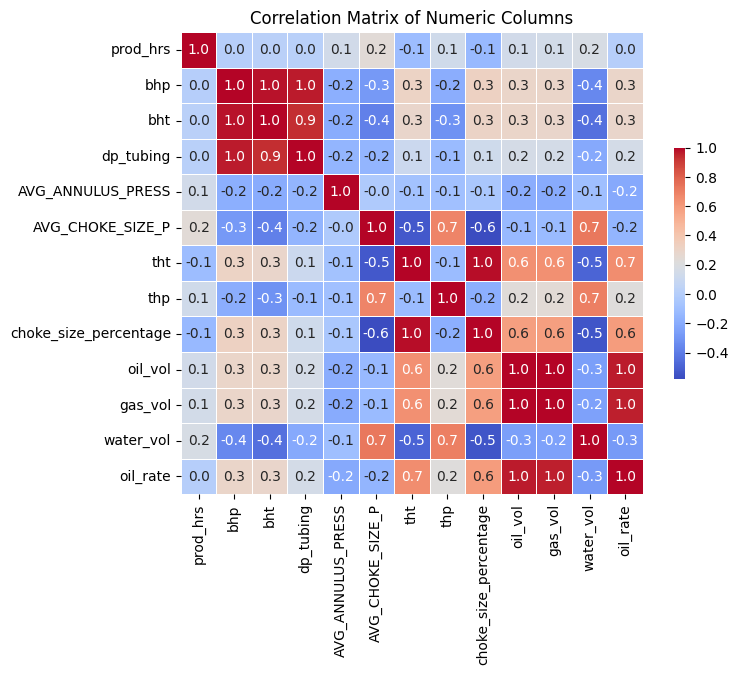

In [441]:
# Compute the correlation matrix
correlation_matrix = df_active_producers_numeric.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".1f", cmap='coolwarm', square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Correlation Matrix of Numeric Columns')
plt.show()

In [442]:
for i in ['oil_rate', 'oil_vol', 'gas_vol', 'water_vol']:
    print("Correlation values for", i)
    print(correlation_matrix[i].sort_values(ascending=False), "\n\n")

Correlation values for oil_rate
oil_rate                 1.000000
oil_vol                  0.965395
gas_vol                  0.962258
tht                      0.654040
choke_size_percentage    0.598886
bhp                      0.291657
bht                      0.287870
thp                      0.222366
dp_tubing                0.153027
prod_hrs                 0.006858
AVG_CHOKE_SIZE_P        -0.154089
AVG_ANNULUS_PRESS       -0.211984
water_vol               -0.280264
Name: oil_rate, dtype: float64 


Correlation values for oil_vol
oil_vol                  1.000000
gas_vol                  0.998467
oil_rate                 0.965395
tht                      0.639554
choke_size_percentage    0.581608
bhp                      0.293987
bht                      0.293338
thp                      0.234521
dp_tubing                0.156694
prod_hrs                 0.142515
AVG_CHOKE_SIZE_P        -0.132090
AVG_ANNULUS_PRESS       -0.194774
water_vol               -0.261391
Name: oil_vol, dtyp

In [443]:
well_info = dict(set([(j, i) for i, j in df_active_producers[['WELL_BORE_CODE', 'well_name']].values.tolist()]))

In [444]:
grouped = df_active_producers.select_dtypes(include=[np.number]).drop(["NPD_FIELD_CODE", "NPD_FACILITY_CODE"], axis=1).groupby(by="well_name")
grouped.describe().round()

prod_hrs                                             bhp                                                      bht                                                 dp_tubing                                                 AVG_ANNULUS_PRESS                                           AVG_CHOKE_SIZE_P                                                 tht                                                thp                                           choke_size_percentage                                          oil_vol                                                      gas_vol                                                                     water_vol                                                        oil_rate                                                      
             count  mean  std  min   25%   50%   75%   max   count   mean    std    min    25%    50%    75%    max   count   mean   std    min    25%    50%    75%    max     count   mean   std    min    25%    50%    75%    max             count  mean   std   min   25%   50%   75%   max            count  mean   std   min   25%   50%    75%    max   count  mean   std   min   25%   50%   75%    max   count  mean   std   min   25%   50%   75%   max                 count  mean   std  min  25%   50%   75%    max   count    mean     std   min    25%     50%     75%     max   count      mean       std     min       25%       50%       75%       max     count    mean     std    min     25%     50%     75%     max    count    mean     std   min    25%     50%     75%      max
well_name                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
5351        2723.0  23.0  3.0  1.0  24.0  24.0  24.0  25.0  2717.0  247.0   25.0    0.0  241.0  247.0  262.0  290.0  2717.0  102.0   9.0    0.0  100.0  102.0  105.0  107.0    2717.0  203.0  30.0    7.0  187.0  206.0  230.0  255.0            2224.0  12.0  10.0   0.0   0.0  14.0  22.0  27.0           2723.0  73.0  28.0   2.0  45.0  77.0  100.0  100.0  2723.0  44.0  18.0   0.0  32.0  35.0  50.0  115.0  2723.0  86.0   6.0  12.0  85.0  87.0  89.0  94.0                2723.0  14.0  17.0  1.0  3.0   6.0  17.0   83.0  2723.0  1448.0  1290.0   4.0  331.0  1042.0  2247.0  5644.0  2723.0  212269.0  182128.0   856.0   50923.0  165200.0  329368.0  789975.0    2723.0  2615.0  1287.0  -59.0  2122.0  3100.0  3492.0  5692.0   2723.0  1509.0  1308.0  23.0  340.0  1079.0  2353.0   7777.0
5599        2836.0  23.0  4.0  0.0  24.0  24.0  24.0  25.0  2830.0   84.0  121.0    0.0    0.0    0.0  243.0  308.0  2830.0   35.0  50.0    0.0    0.0    0.0  106.0  108.0    2830.0   85.0  71.0   26.0   33.0   39.0  172.0  259.0            2823.0  18.0   5.0   0.0  15.0  19.0  21.0  30.0           2836.0  73.0  26.0   1.0  51.0  75.0  100.0  100.0  2836.0  48.0  20.0   0.0  33.0  39.0  59.0  121.0  2836.0  84.0   8.0  16.0  79.0  86.0  90.0  92.0                2836.0  17.0  19.0  0.0  4.0   7.0  26.0  106.0  2836.0  1615.0  1671.0   1.0  360.0   742.0  2666.0  5902.0  2836.0  235381.0  235898.0   183.0   54797.0  118564.0  377112.0  851132.0    2836.0  2409.0  1921.0 -458.0   552.0  2128.0  4480.0  8020.0   2836.0  1679.0  1742.0  12.0  389.0   830.0  2783.0  24306.0
5769         121.0  24.0  2.0  6.0  24.0  24.0  24.0  24.0     0.0    NaN    NaN    NaN    NaN    NaN    NaN  

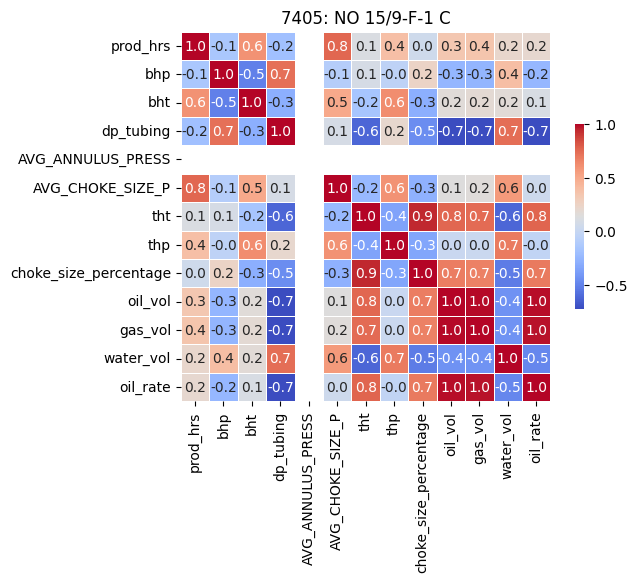

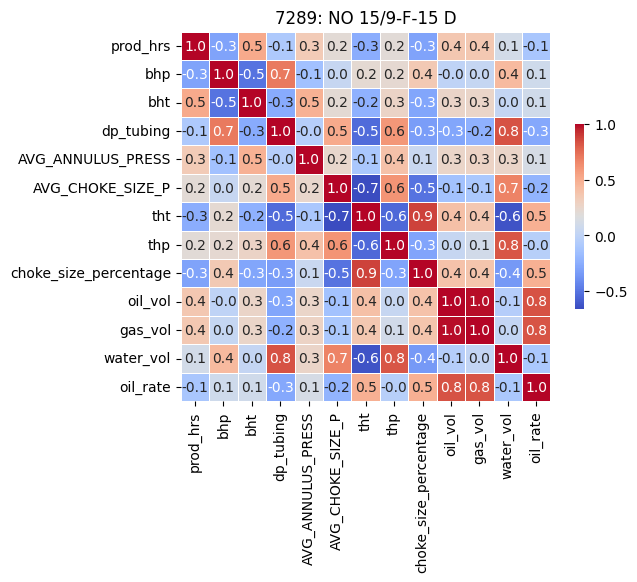

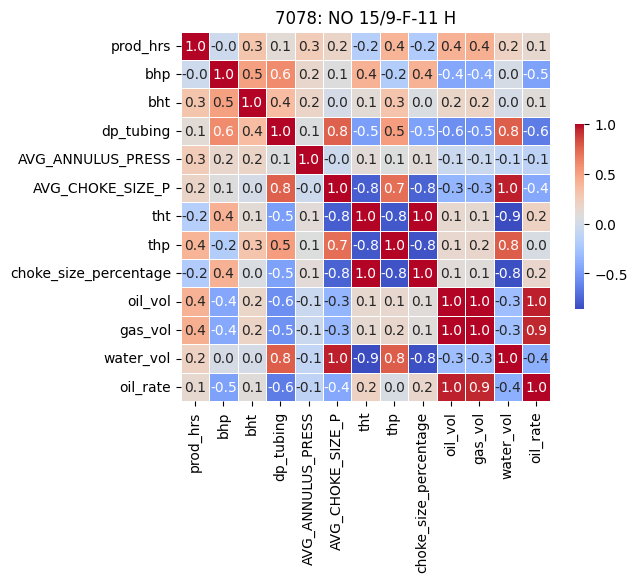

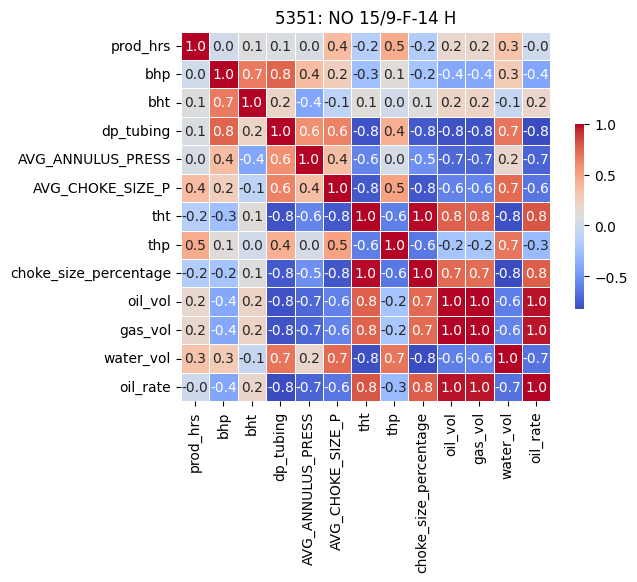

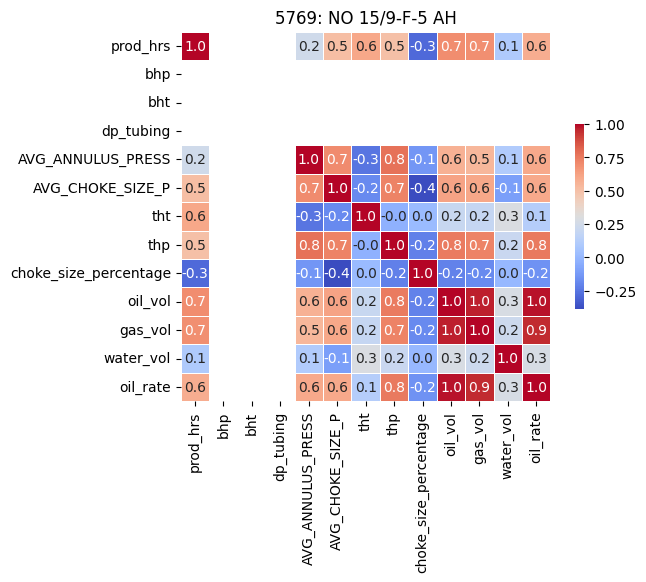

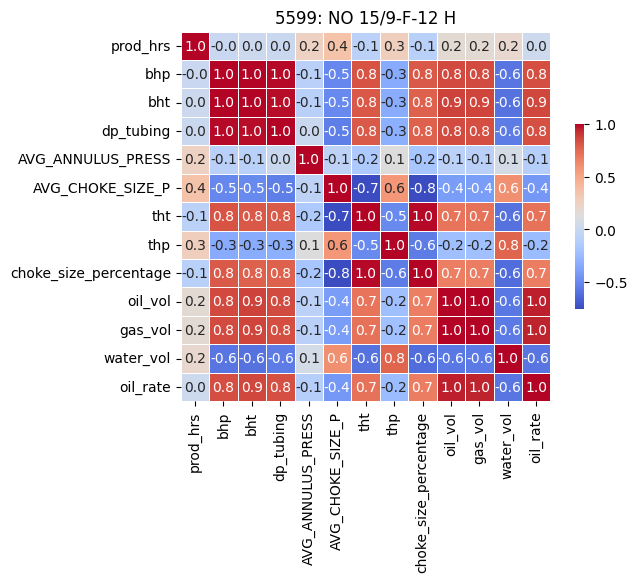

In [445]:
for i, j in well_info.items():
    correlation_matrix = df_active_producers[(df_active_producers.well_name==int(i))].select_dtypes(include=[np.number]).drop(["NPD_FIELD_CODE", "NPD_FACILITY_CODE", "well_name"], axis=1).corr()
    sns.heatmap(correlation_matrix, annot=True, fmt=".1f", cmap='coolwarm', square=True, linewidths=.5, cbar_kws={"shrink": .5})
    plt.title(f'{i}: {j}')
    plt.show()


In [446]:
print(df_active_producers[(df_active_producers.well_name==int(5769))][['bhp', 'bht', 'dp_tubing']].isna().all().all())

True


In [447]:
print(df_active_producers[(df_active_producers.well_name==int(7405))]['AVG_ANNULUS_PRESS'])

0      0.0
1      NaN
2      NaN
3      NaN
4      NaN
5      NaN
6      NaN
7      NaN
8      NaN
9      NaN
10     NaN
11     NaN
12     NaN
13     NaN
14     NaN
15     NaN
16     NaN
17     NaN
18     NaN
19     NaN
20     NaN
21     NaN
22     NaN
23     NaN
24     NaN
25     NaN
26     NaN
27     NaN
28     NaN
29     NaN
30     NaN
31     NaN
32     NaN
33     NaN
34     NaN
35     NaN
36     NaN
37     NaN
38     NaN
39     NaN
40     NaN
41     NaN
42     NaN
43     NaN
44     NaN
45     NaN
46     NaN
47     NaN
48     NaN
49     NaN
50     NaN
51     NaN
52     NaN
53     NaN
54     NaN
55     NaN
56     NaN
57     NaN
58     NaN
59     NaN
60     NaN
61     NaN
62     NaN
63     NaN
64     NaN
65     NaN
66     NaN
67     NaN
68     NaN
69     NaN
70     NaN
71     NaN
72     NaN
73     NaN
74     NaN
75     NaN
76     NaN
77     NaN
78     NaN
79     NaN
80     NaN
81     NaN
82     NaN
83     NaN
84     NaN
85     NaN
86     NaN
87     NaN
88     NaN
89     NaN
90     NaN

In [448]:
for i, j in well_info.items():
    correlation_matrix = df_active_producers[(df_active_producers.well_name==int(i))].select_dtypes(include=[np.number]).drop(["NPD_FIELD_CODE", "NPD_FACILITY_CODE", "well_name"], axis=1).corr()
    print(f'FOR WELL {i}: {j}\n')
    for m in ['oil_rate', 'oil_vol', 'gas_vol', 'water_vol']:
        print("\tCorrelation values for", m)
        print(correlation_matrix[m].sort_values(ascending=False), "\n\n")

FOR WELL 7405: NO 15/9-F-1 C

	Correlation values for oil_rate
oil_rate                 1.000000
oil_vol                  0.986012
gas_vol                  0.975280
tht                      0.770612
choke_size_percentage    0.696287
prod_hrs                 0.204930
bht                      0.099897
AVG_CHOKE_SIZE_P         0.042972
thp                     -0.023892
bhp                     -0.245539
water_vol               -0.482699
dp_tubing               -0.723150
AVG_ANNULUS_PRESS             NaN
Name: oil_rate, dtype: float64 


	Correlation values for oil_vol
oil_vol                  1.000000
gas_vol                  0.991419
oil_rate                 0.986012
tht                      0.758164
choke_size_percentage    0.679712
prod_hrs                 0.337700
bht                      0.163125
AVG_CHOKE_SIZE_P         0.144612
thp                      0.014585
bhp                     -0.254793
water_vol               -0.439761
dp_tubing               -0.721901
AVG_ANNULUS_PRESS    

add choke size axis

group monthly

In [449]:
for i, j in well_info.items():
    gap_counter = 0
    consecutive_counter = 0 
    dates = list(df_active_producers[(df_active_producers.well_name==i)]['date'])
    print(f'FOR WELL {i}: {j}\n')
    print("The gap dates are:")
    for m in range(len(dates) - 1):
        if (dates[m+1] - dates[m]) > pd.Timedelta(days=1):
            gap_counter += 1
            print((dates[m].strftime('%Y-%m-%d'), dates[m+1].strftime('%Y-%m-%d')))
        else:
            consecutive_counter += 1
    print(f"There are {gap_counter} gaps in dates\nThere are {consecutive_counter} consecutive dates\n\n")

FOR WELL 7405: NO 15/9-F-1 C

The gap dates are:
('2014-07-06', '2014-07-08')
('2014-08-18', '2014-09-03')
('2014-09-28', '2014-10-01')
('2014-11-23', '2014-11-30')
('2014-12-01', '2015-01-01')
('2015-01-21', '2015-02-09')
('2015-02-27', '2015-03-18')
('2015-04-01', '2015-04-20')
('2015-05-03', '2015-05-22')
('2015-05-27', '2015-06-11')
('2015-07-01', '2015-07-22')
('2015-08-07', '2015-09-04')
('2015-09-20', '2015-10-14')
('2015-10-30', '2015-11-18')
('2015-12-09', '2016-01-04')
('2016-01-20', '2016-02-06')
('2016-02-26', '2016-02-28')
('2016-02-28', '2016-03-17')
There are 18 gaps in dates
There are 410 consecutive dates


FOR WELL 7289: NO 15/9-F-15 D

The gap dates are:
('2014-01-28', '2014-02-01')
('2014-02-06', '2014-02-08')
('2014-08-19', '2014-09-02')
('2014-11-25', '2015-01-01')
('2015-03-22', '2015-03-25')
('2015-07-18', '2015-08-15')
('2015-08-26', '2015-08-31')
('2015-11-18', '2015-11-20')
('2015-11-22', '2015-12-09')
('2016-01-04', '2016-01-20')
('2016-03-24', '2016-04-06')

check for date gaps

time series stats: stationality 

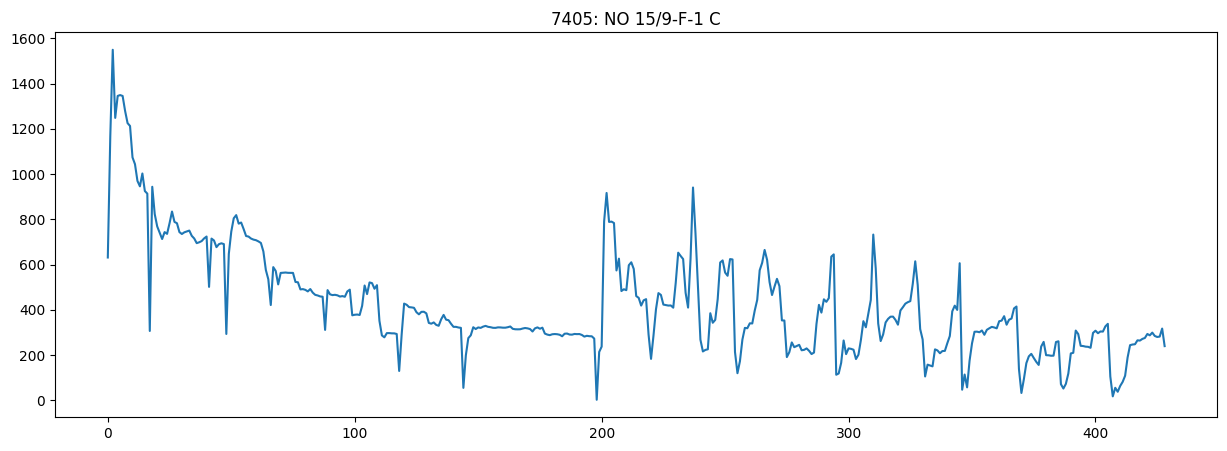

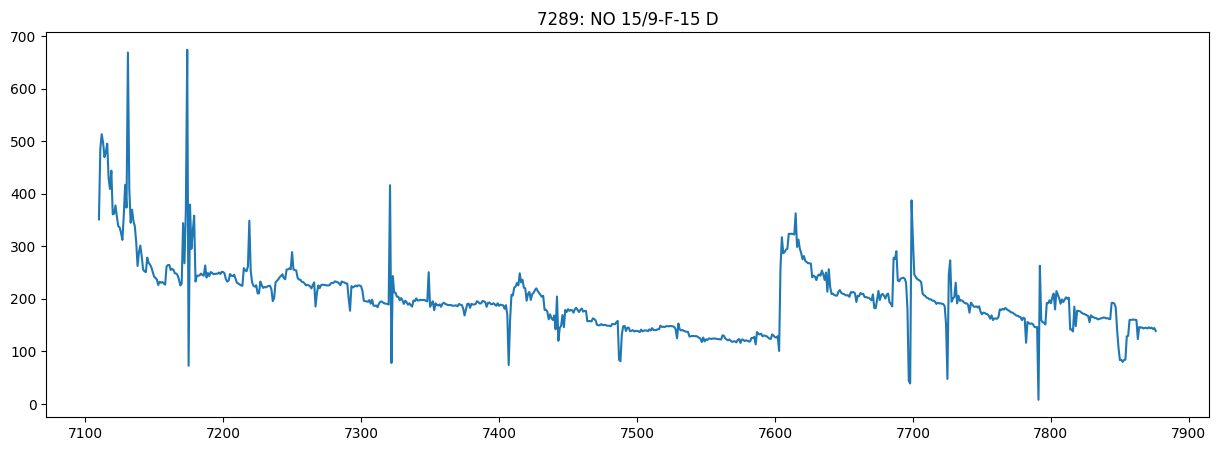

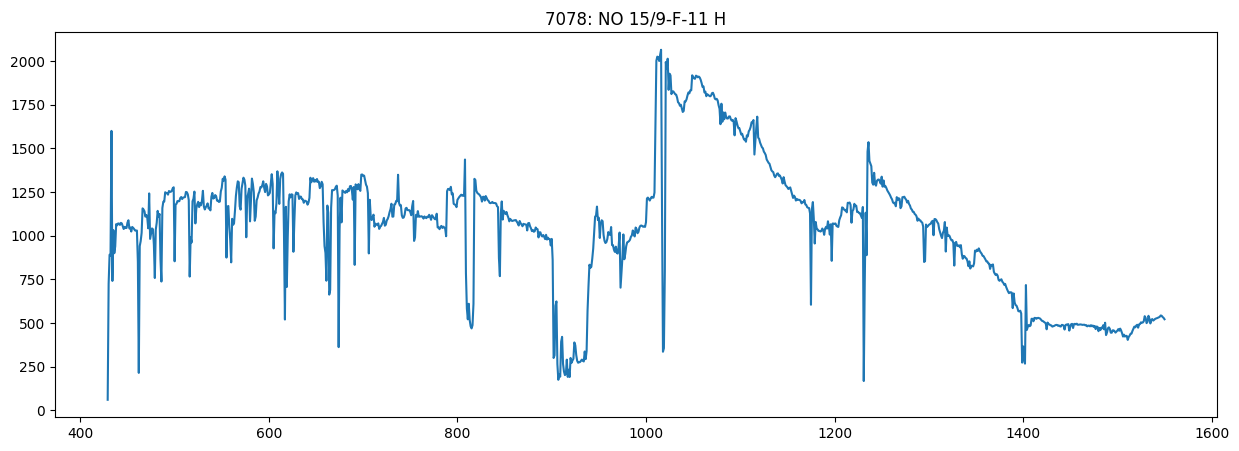

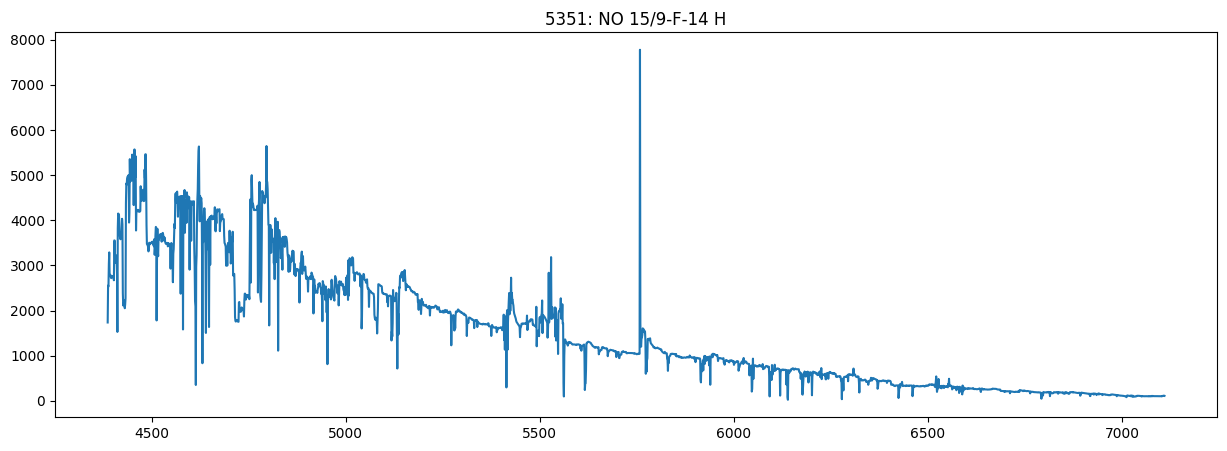

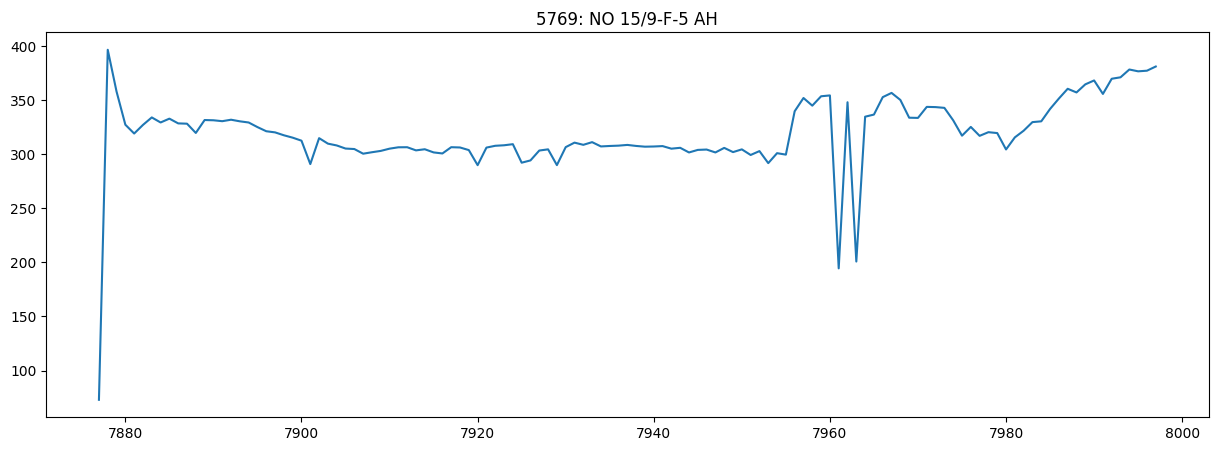

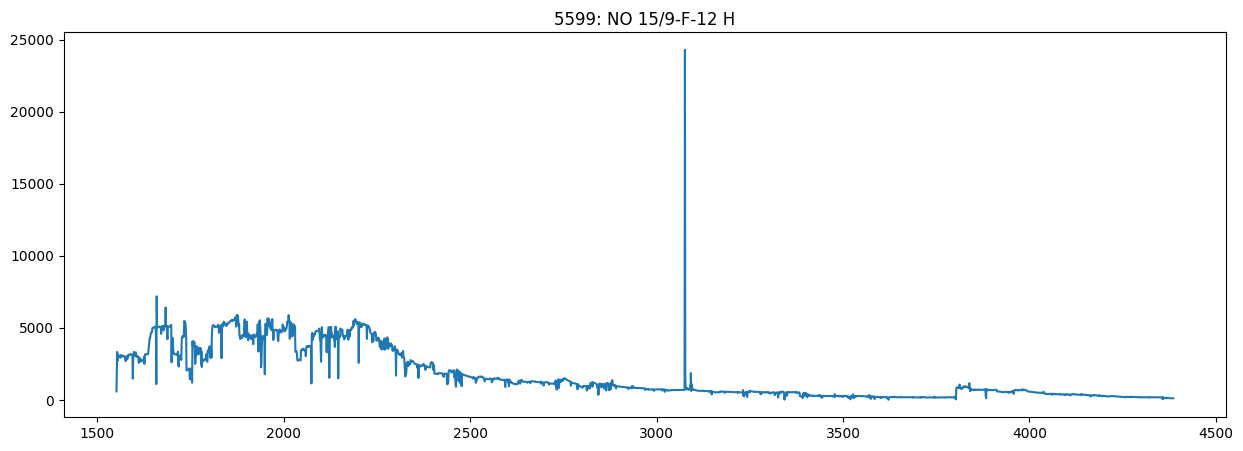

In [450]:
for i, j in well_info.items():
    plt.figure(figsize=(15,5))
    plt.title(f'{i}: {j}')
    plt.plot(df_active_producers[(df_active_producers.well_name==i)]['oil_rate'])
    plt.show()

In [494]:
df_active_producers_outliers = df_active_producers.copy()
df_active_producers_outliers[['z_score_outlier', 'gradient_outlier', 'outlier']] = False

In [535]:
z_score_flag = 4
gradient_flag = 3

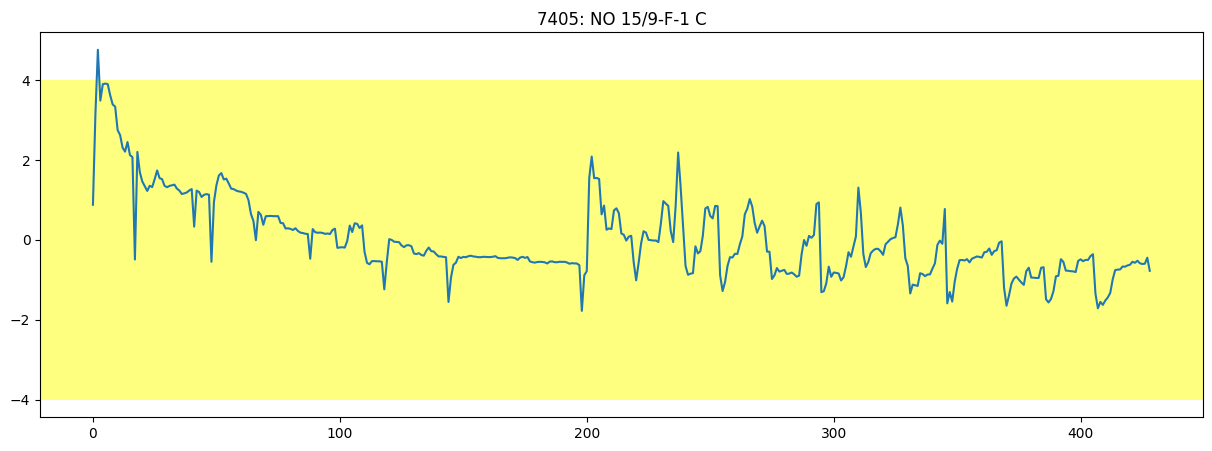

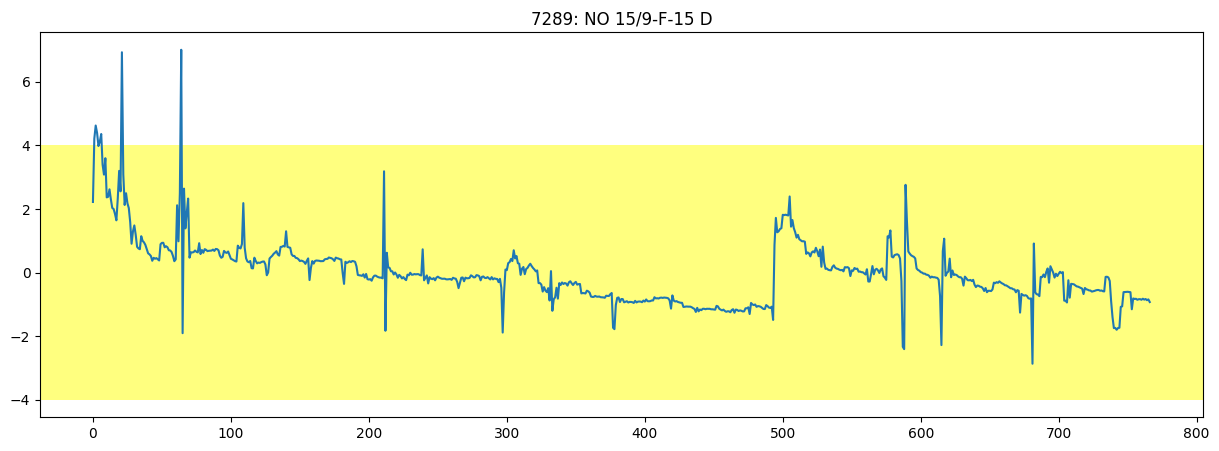

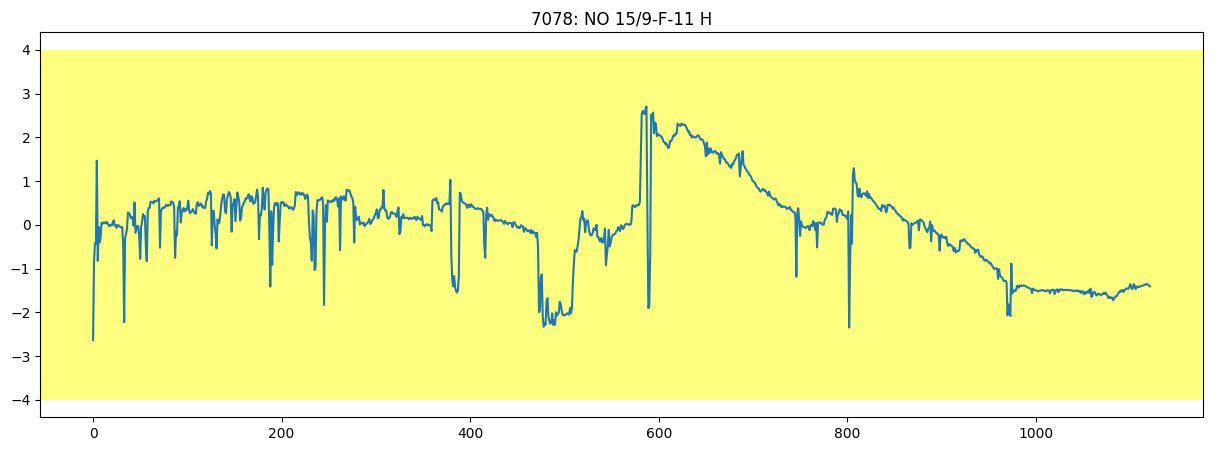

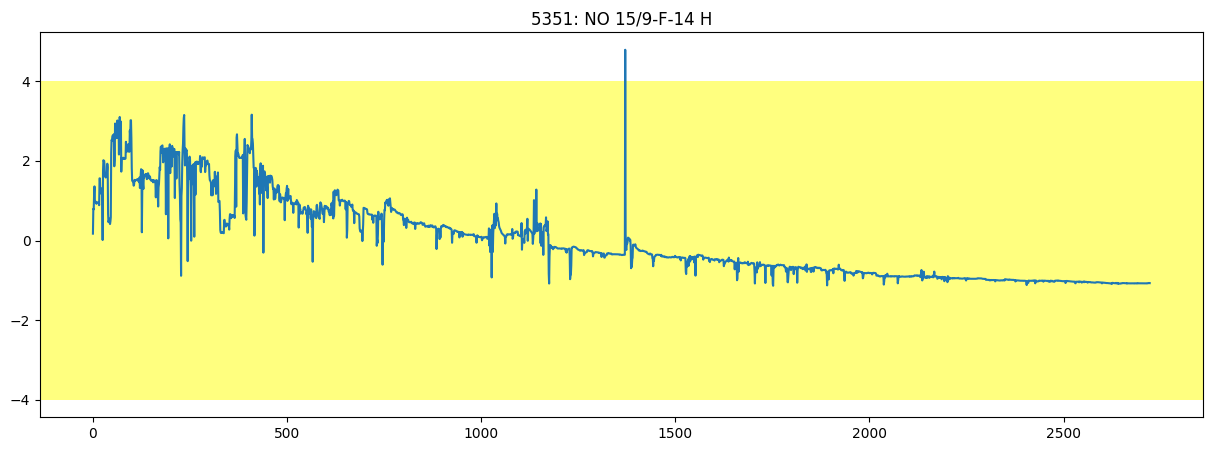

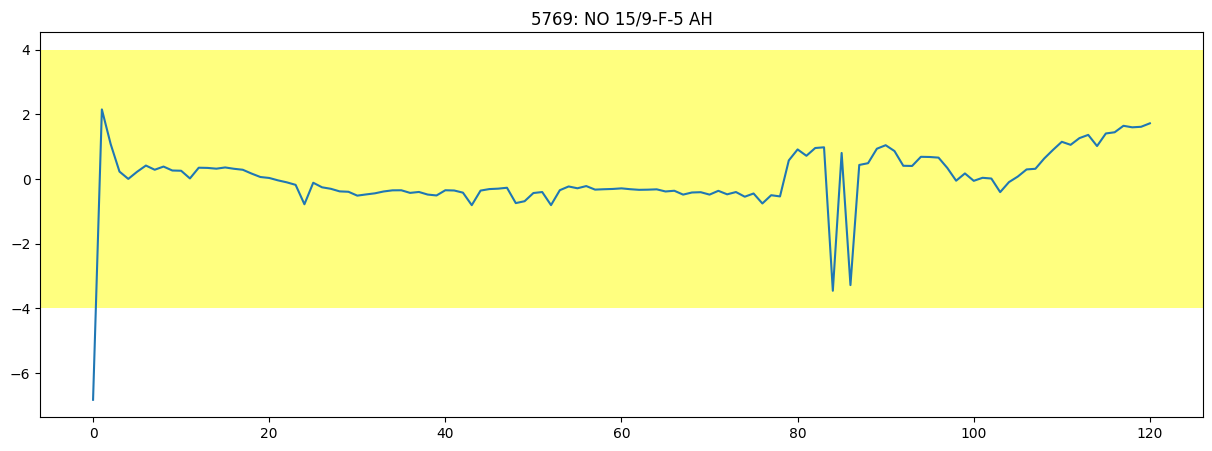

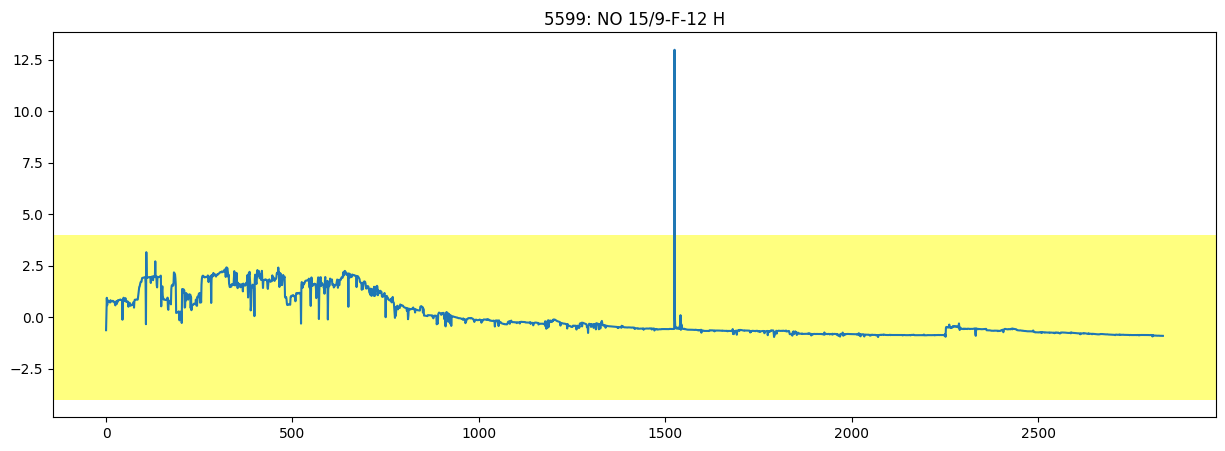

In [536]:
for i, j in well_info.items():
    plt.figure(figsize=(15,5))
    plt.title(f'{i}: {j}')
    well = df_active_producers_outliers[(df_active_producers_outliers.well_name==i)]['oil_rate']
    z_score = (well - well.mean()) / well.std()
    z_score_outlier_check = (z_score > z_score_flag) | (z_score < -z_score_flag)
    df_active_producers_outliers.loc[(df_active_producers_outliers.well_name==i), 'z_score_outlier'] = z_score_outlier_check
    plt.plot(z_score.reset_index()['oil_rate'])
    plt.axhspan(-z_score_flag, z_score_flag, facecolor='yellow', alpha=0.5)
    plt.show()

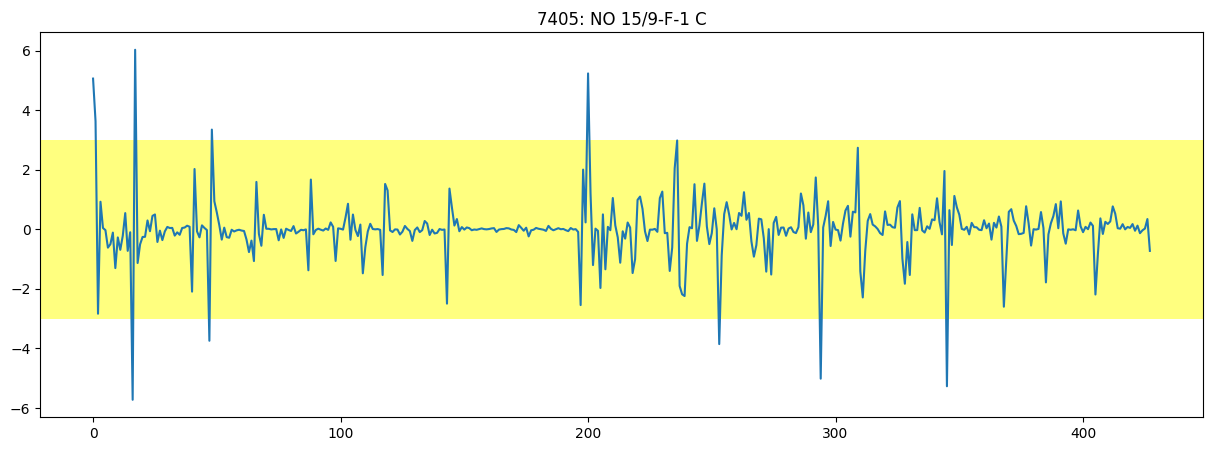

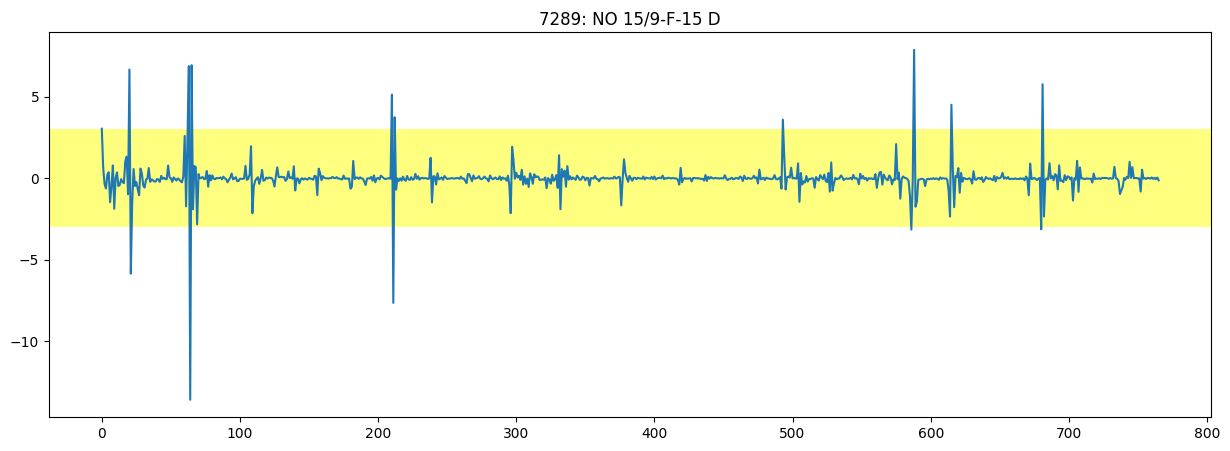

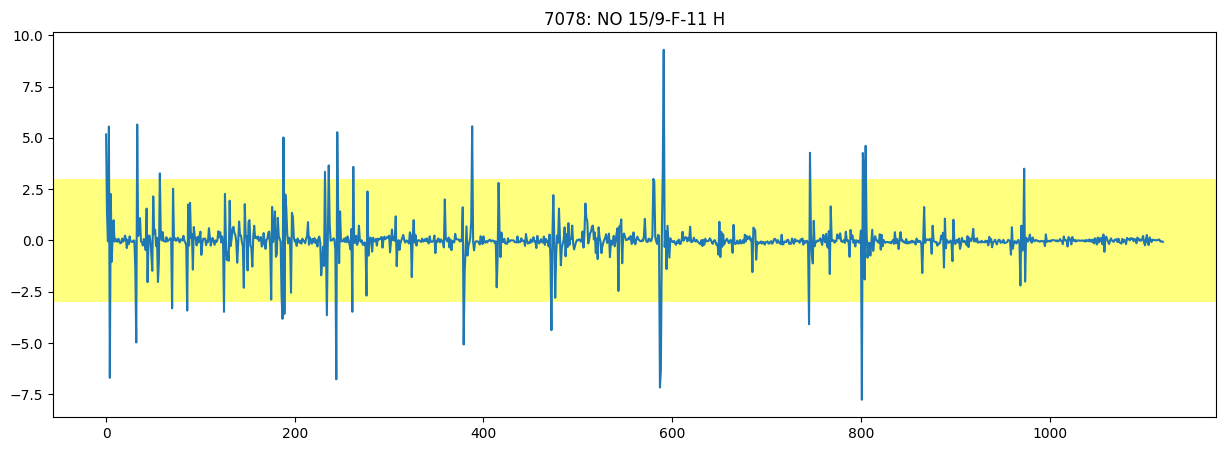

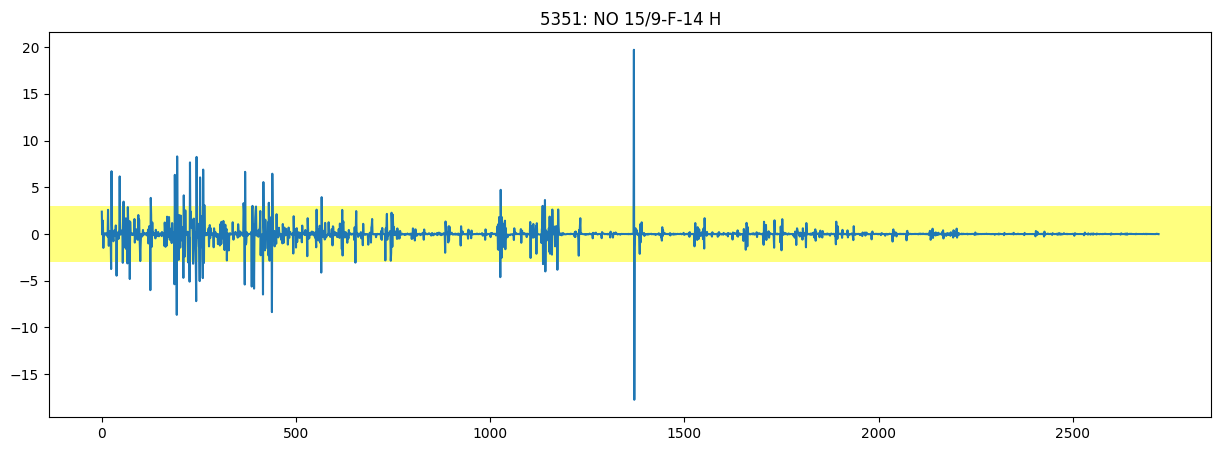

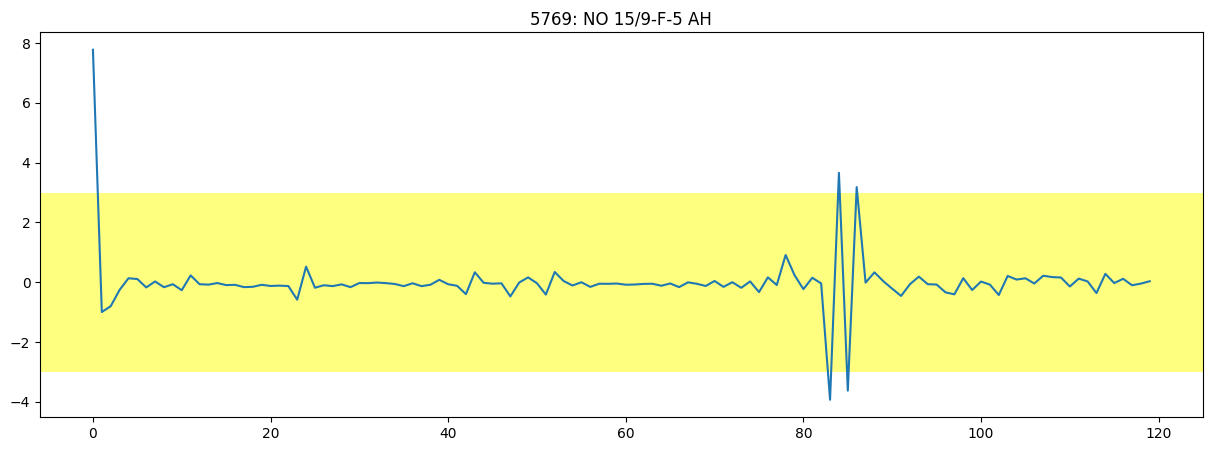

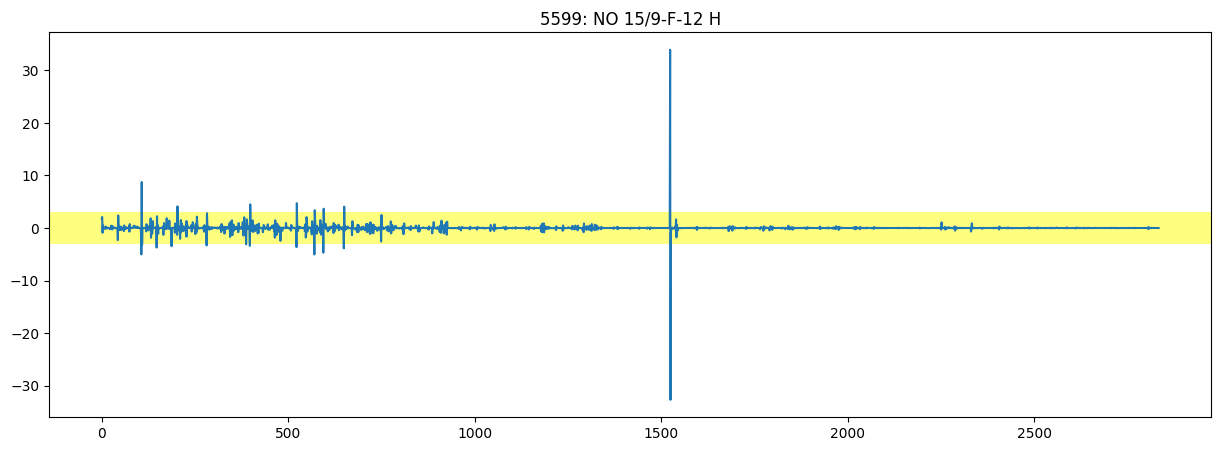

In [537]:

for i, j in well_info.items():
    plt.figure(figsize=(15,5))
    plt.title(f'{i}: {j}')
    well = df_active_producers_outliers[(df_active_producers_outliers.well_name==i)]['oil_rate'].diff().shift(-1)
    z_score = (well - well.mean()) / well.std()
    gradient_outlier_check = (z_score > gradient_flag) | (z_score < -gradient_flag)
    df_active_producers_outliers.loc[(df_active_producers_outliers.well_name==i), 'gradient_outlier'] = gradient_outlier_check
    plt.plot(z_score.reset_index()['oil_rate'])
    plt.axhspan(-gradient_flag, gradient_flag, facecolor='yellow', alpha=0.5)
    plt.show()

In [538]:
df_active_producers_outliers['outlier'] = df_active_producers_outliers['z_score_outlier'] & df_active_producers_outliers['gradient_outlier'] 

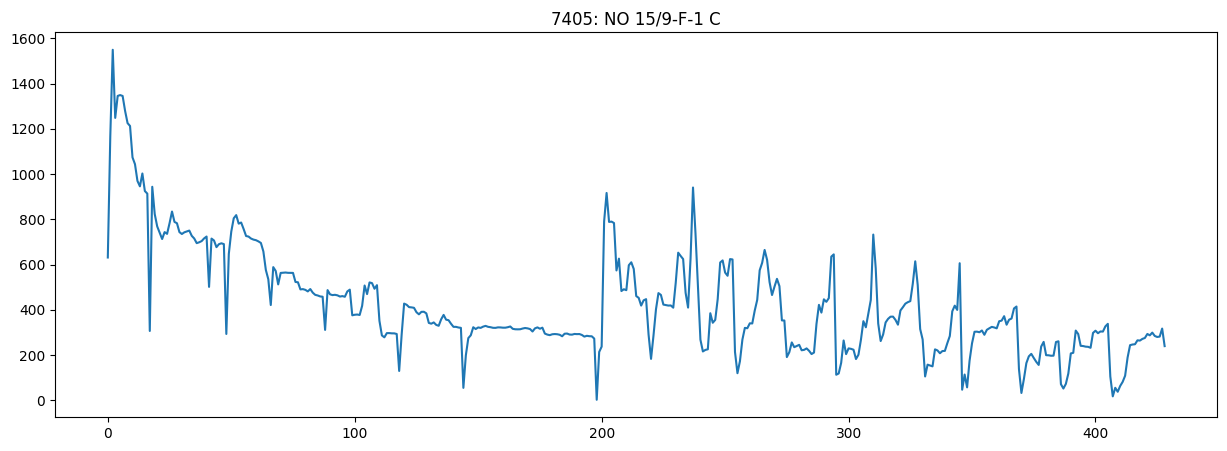

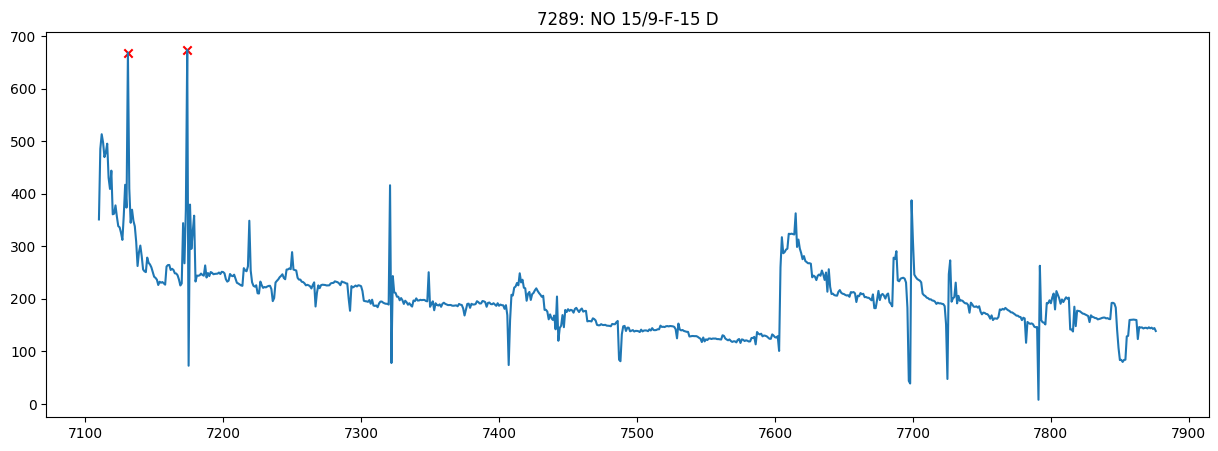

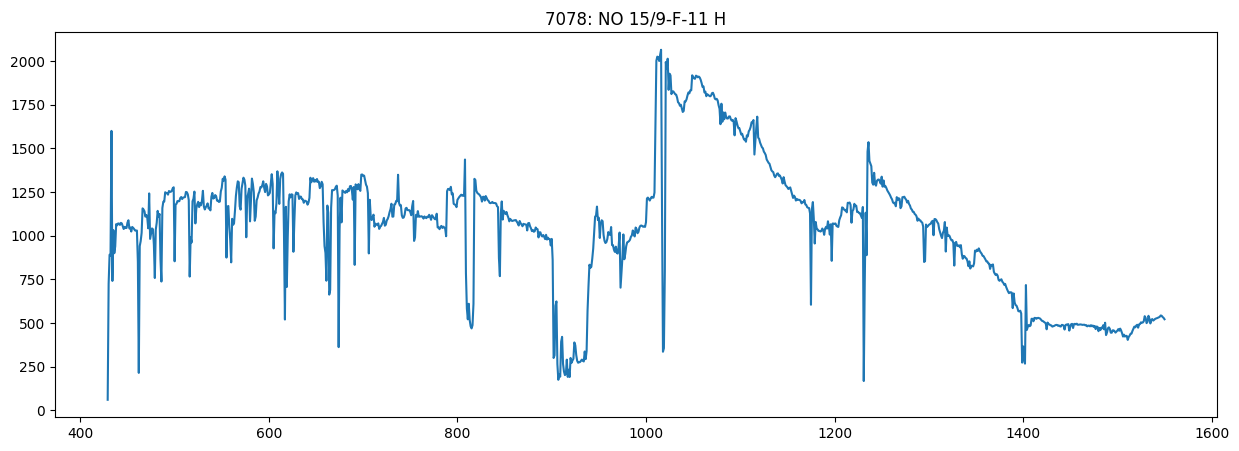

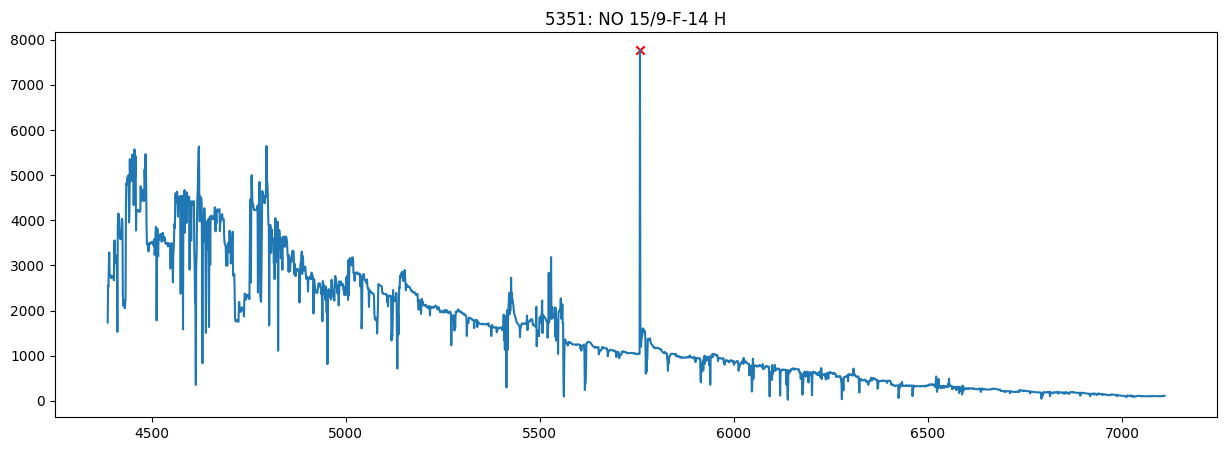

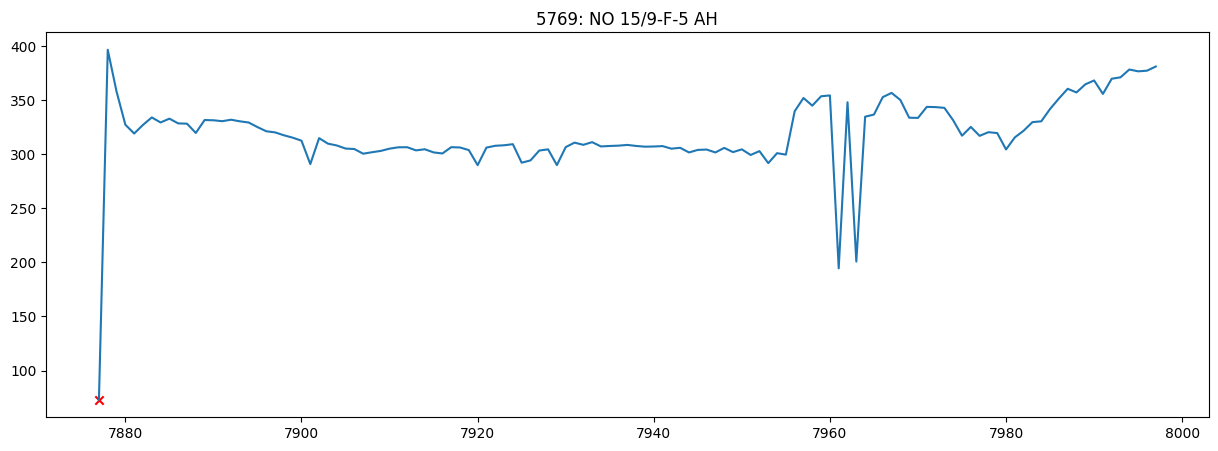

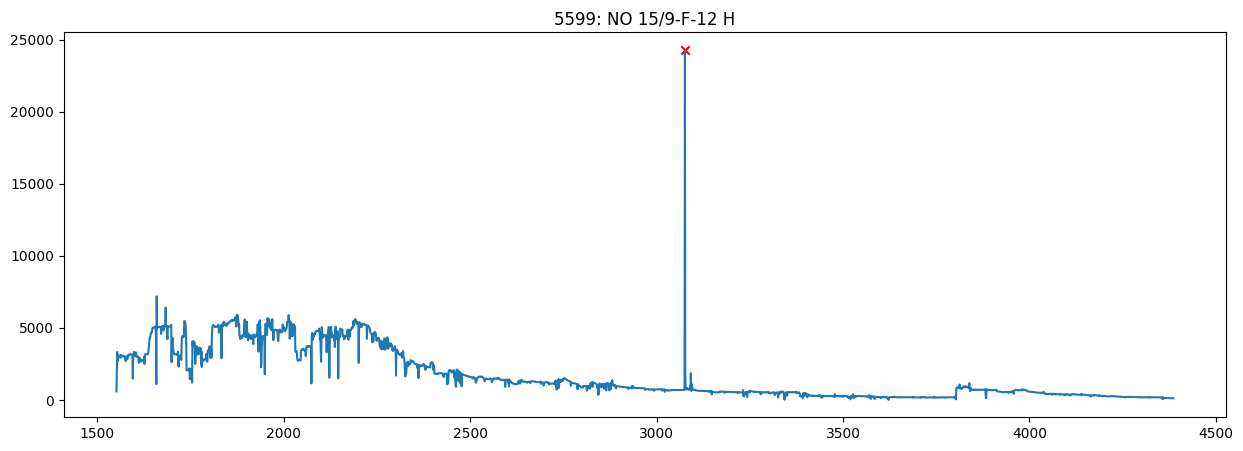

In [539]:
for i, j in well_info.items():
    plt.figure(figsize=(15,5))
    plt.title(f'{i}: {j}')
    well = df_active_producers_outliers[(df_active_producers_outliers.well_name==i)]
    outlier_indices = well[well['outlier'] == True]['outlier'].index
    plt.plot(well['oil_rate'])
    plt.scatter(outlier_indices, well.loc[outlier_indices, 'oil_rate'], color='red', marker='x', label='Outliers')
    plt.show()

In [547]:
from statsmodels.tsa.stattools import adfuller, kpss
for i, j in well_info.items():
    print(f'FOR WELL {i}: {j}\n')
    timeseries_data = df_active_producers[(df_active_producers.well_name==i)]['oil_rate']
    adf_result = adfuller(timeseries_data, autolag='AIC')
    print('ADF Statistic:', adf_result[0])
    print('p-value:', adf_result[1])
    print('Critical Values:', adf_result[4])

    kpss_result = kpss(timeseries_data, regression='c')
    print('KPSS Statistic:', kpss_result[0])
    print('p-value:', kpss_result[1])
    print('Critical Values:', kpss_result[3])
    print("\n\n")

FOR WELL 7405: NO 15/9-F-1 C

ADF Statistic: -4.476569364317093
p-value: 0.00021672431327245632
Critical Values: {'1%': -3.445867291195605, '5%': -2.868380822100627, '10%': -2.5704139268867925}
KPSS Statistic: 1.9735267746709648
p-value: 0.01
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}



FOR WELL 7289: NO 15/9-F-15 D

ADF Statistic: -4.954244235325222
p-value: 2.7317205519950985e-05
Critical Values: {'1%': -3.4389608473398194, '5%': -2.8653404270188476, '10%': -2.568793735369693}
KPSS Statistic: 1.6235136766485745
p-value: 0.01
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}



FOR WELL 7078: NO 15/9-F-11 H

ADF Statistic: -1.9646468570500872
p-value: 0.30228602204519395
Critical Values: {'1%': -3.4362442981669505, '5%': -2.864142643826014, '10%': -2.56815572489131}
KPSS Statistic: 1.1895821428901956
p-value: 0.01
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}



FOR WELL 5351: NO 15/9-F-14 H



/var/folders/d8/xf5yjrpn5zvd1j56c42jys2w0000gn/T/ipykernel_4208/3518394179.py:10: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_result = kpss(timeseries_data, regression='c')
/var/folders/d8/xf5yjrpn5zvd1j56c42jys2w0000gn/T/ipykernel_4208/3518394179.py:10: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_result = kpss(timeseries_data, regression='c')
/var/folders/d8/xf5yjrpn5zvd1j56c42jys2w0000gn/T/ipykernel_4208/3518394179.py:10: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_result = kpss(timeseries_data, regression='c')


ADF Statistic: -1.566639369826869
p-value: 0.5003266055980286
Critical Values: {'1%': -3.432774269604887, '5%': -2.8626110643113347, '10%': -2.567340163100137}
KPSS Statistic: 8.071011638465443
p-value: 0.01
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}



FOR WELL 5769: NO 15/9-F-5 AH

ADF Statistic: -1.5554052547406125
p-value: 0.5059471008499128
Critical Values: {'1%': -3.4885349695076844, '5%': -2.887019521656941, '10%': -2.5803597920604915}
KPSS Statistic: 0.8299764077509882
p-value: 0.01
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}



FOR WELL 5599: NO 15/9-F-12 H

ADF Statistic: -1.7565032421428621
p-value: 0.402260263641927
Critical Values: {'1%': -3.4326710150605764, '5%': -2.862565463281347, '10%': -2.5673158851415923}
KPSS Statistic: 7.026127261753334
p-value: 0.01
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}





/var/folders/d8/xf5yjrpn5zvd1j56c42jys2w0000gn/T/ipykernel_4208/3518394179.py:10: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_result = kpss(timeseries_data, regression='c')
/var/folders/d8/xf5yjrpn5zvd1j56c42jys2w0000gn/T/ipykernel_4208/3518394179.py:10: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_result = kpss(timeseries_data, regression='c')
/var/folders/d8/xf5yjrpn5zvd1j56c42jys2w0000gn/T/ipykernel_4208/3518394179.py:10: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_result = kpss(timeseries_data, regression='c')


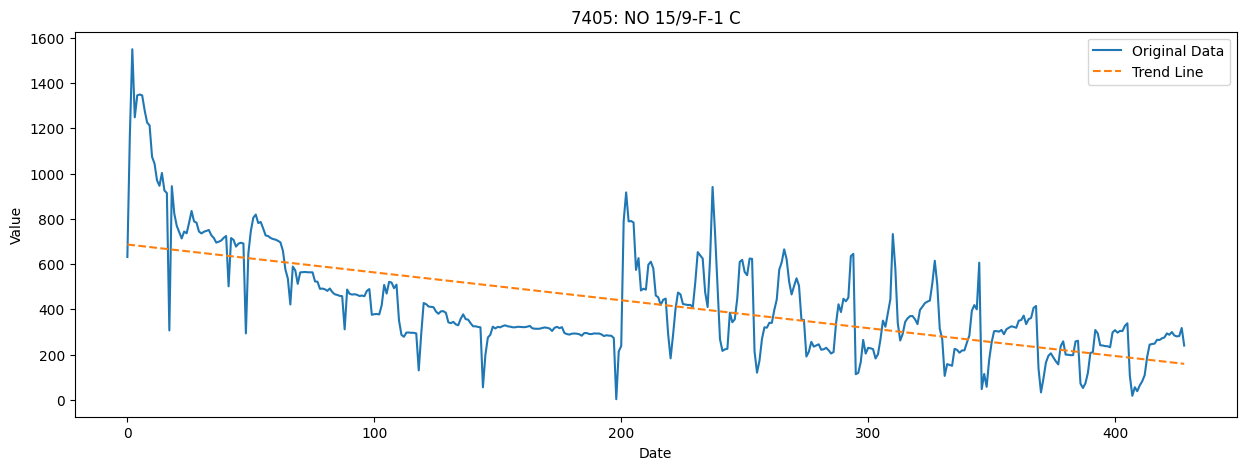

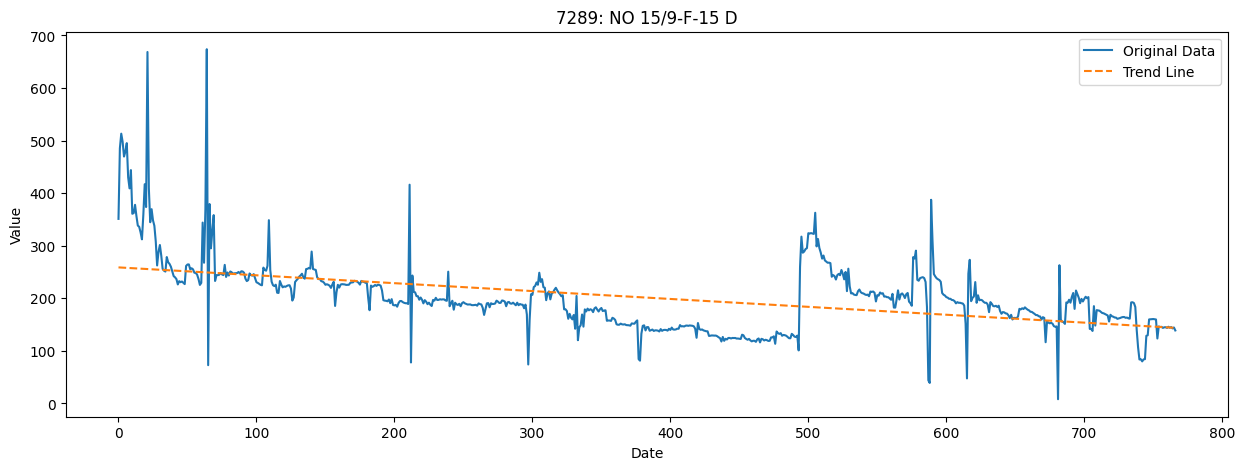

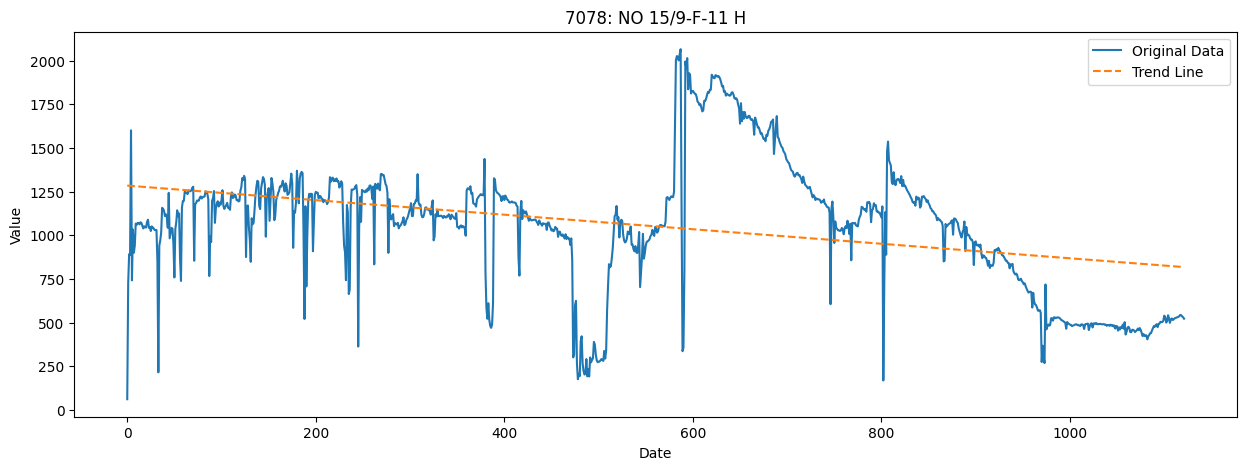

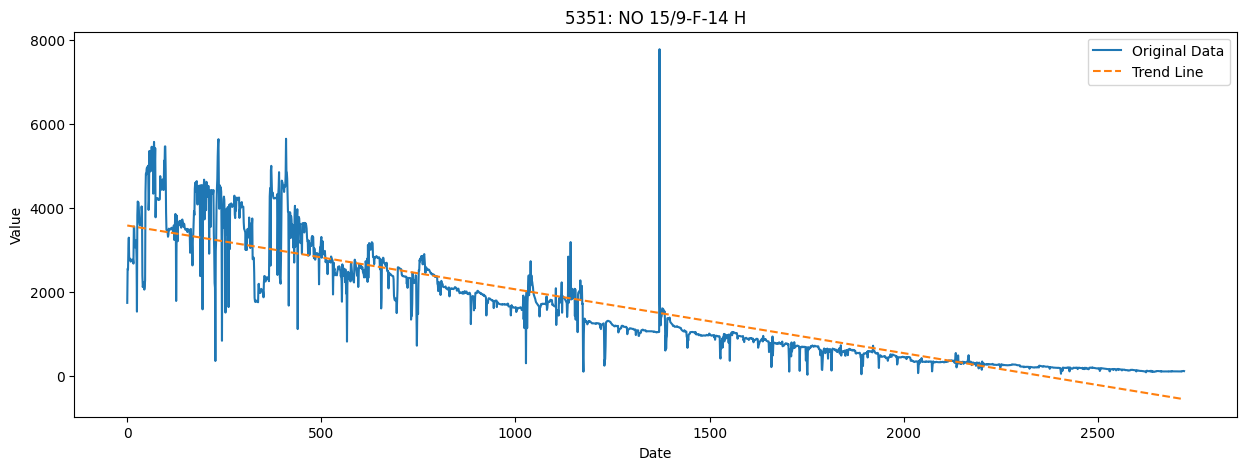

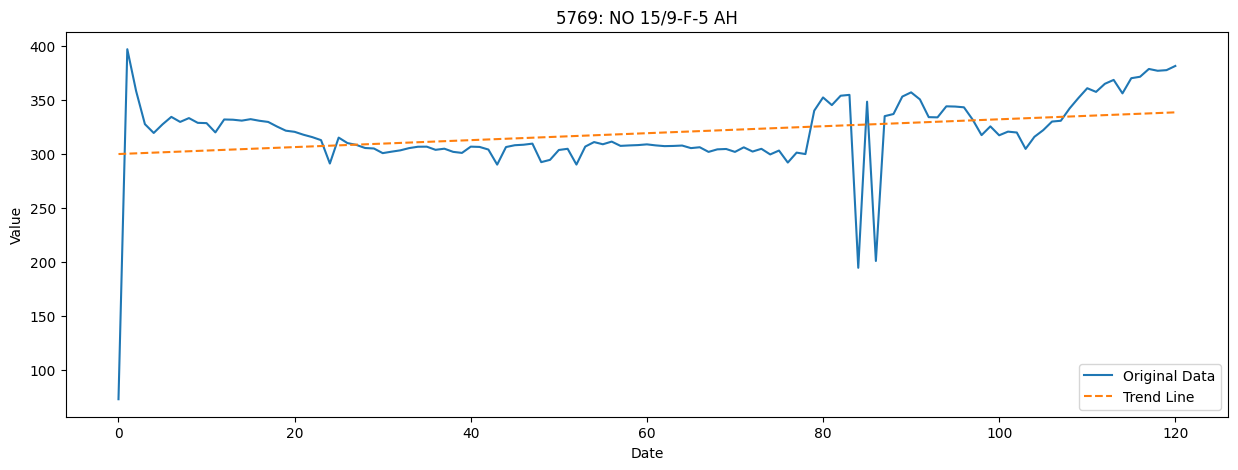

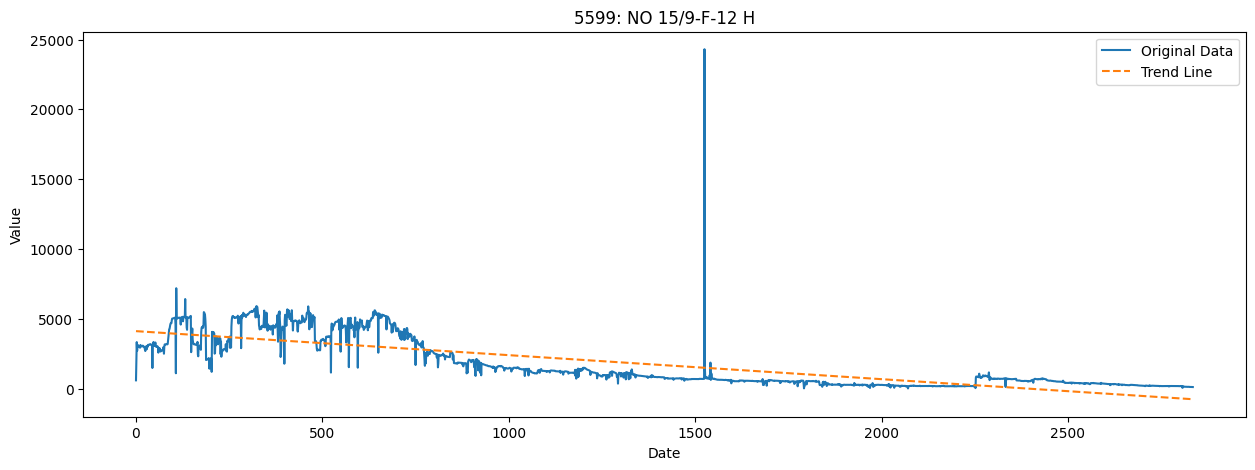

In [555]:
for i, j in well_info.items():
    # Fit a linear regression model
    linear_regression_model = LinearRegression()
    well = df_active_producers[(df_active_producers.well_name==i)].reset_index()['oil_rate']
    well_index = np.arange(len(well)).reshape(-1, 1)
    linear_regression_model.fit(well_index, well)

    # Predict the trend
    trend_line = linear_regression_model.predict(well_index)

    # Plot the original data and the trend line
    plt.figure(figsize=(15,5))
    plt.title(f'{i}: {j}')  
    plt.plot(well, label='Original Data')
    plt.plot(well.index, trend_line, label='Trend Line', linestyle='--')
    plt.legend()
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.show()

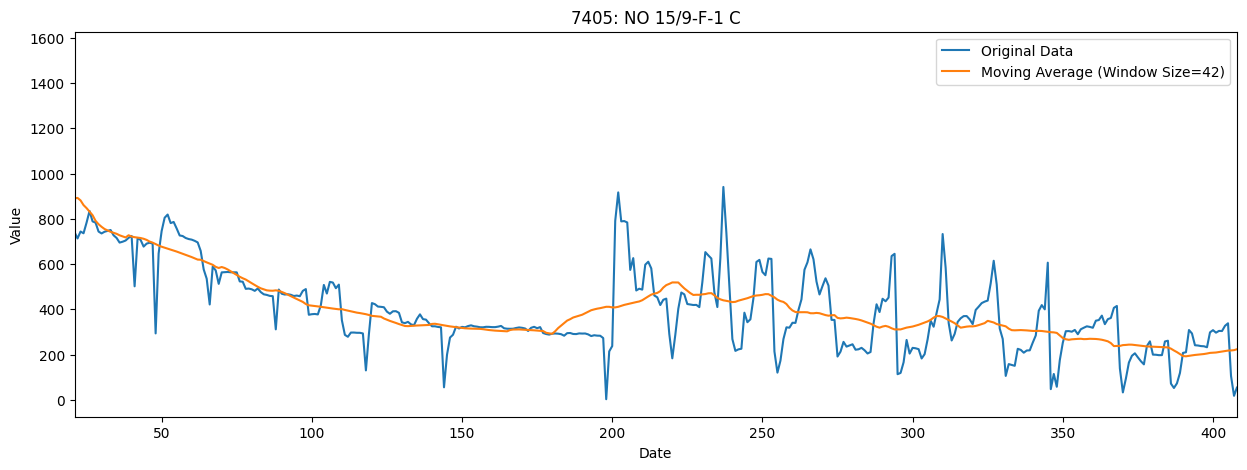

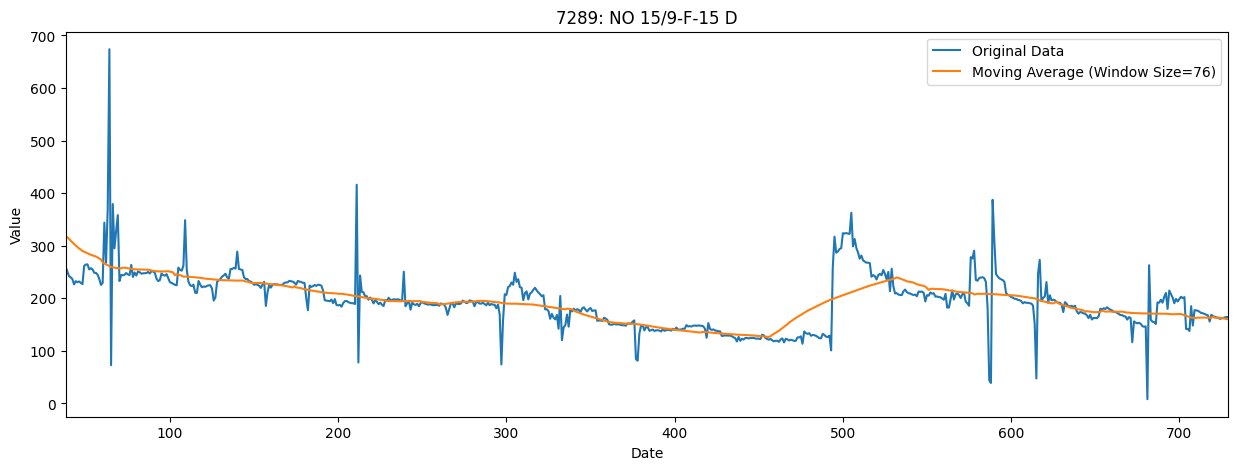

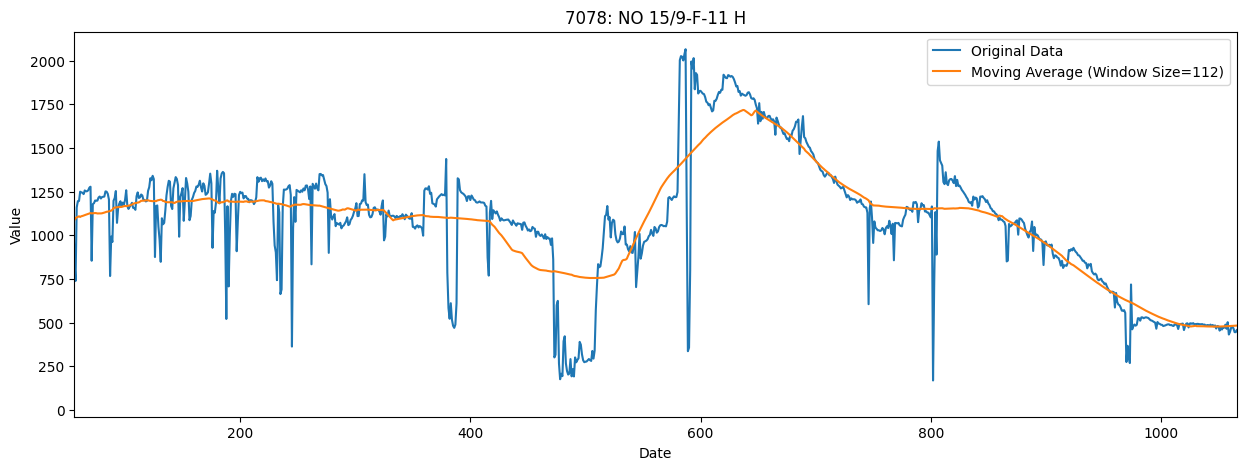

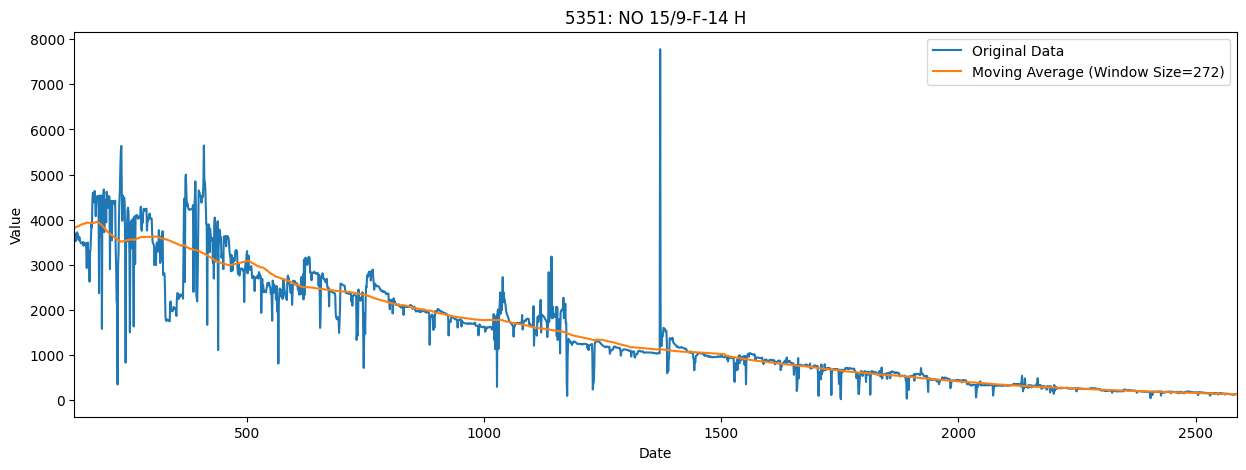

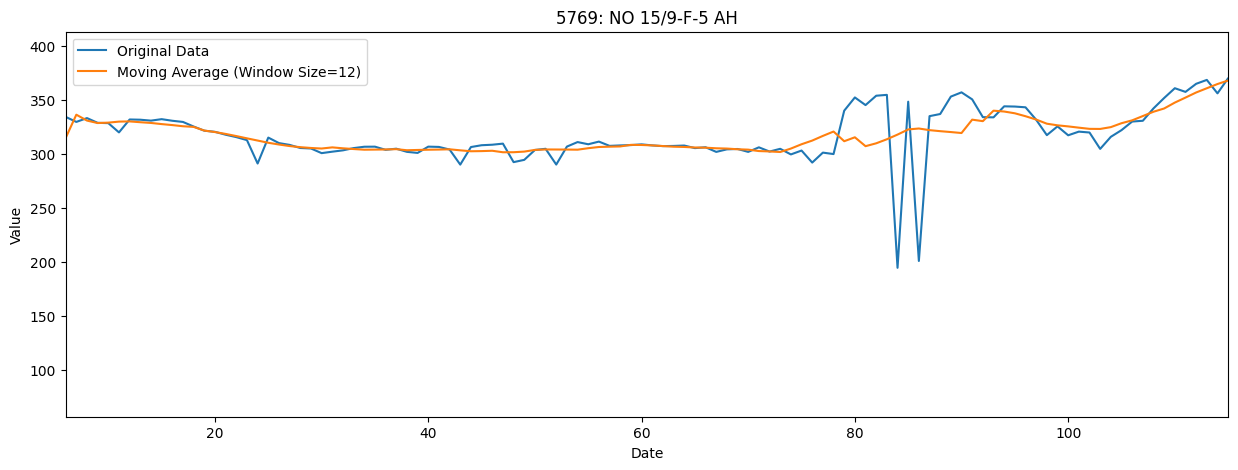

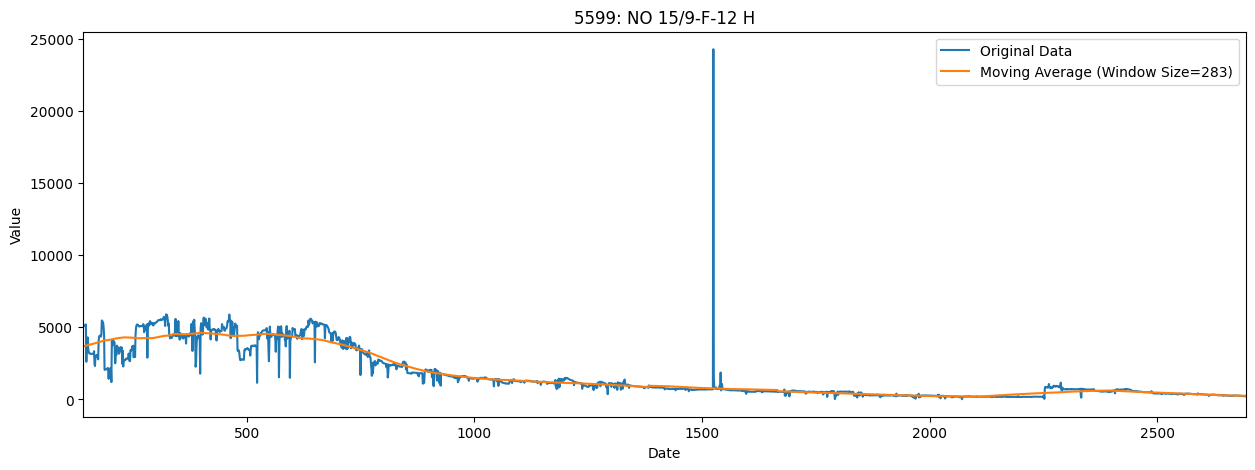

In [570]:
for i, j in well_info.items():
    # Calculate the moving average
    well = df_active_producers[(df_active_producers.well_name==i)].reset_index()['oil_rate']
    window_size = int(len(well) * 0.1)
    rolling_avg = well.rolling(window=window_size, center=True).mean()

    # Plot the original data and the moving average
    plt.figure(figsize=(15,5))
    plt.title(f'{i}: {j}')  
    plt.plot(well, label='Original Data')
    plt.plot(rolling_avg, label=f'Moving Average (Window Size={window_size})')
    plt.legend()
    plt.xlabel('Date')
    plt.ylabel('Value')
    start_date = well.index[window_size // 2]
    end_date = well.index[-window_size // 2]
    plt.xlim(start_date, end_date)
    plt.show()

date
April 2014        1238.052222
May 2014           807.480232
June 2014          662.763913
July 2014          486.140827
August 2014        387.246111
September 2014     354.104834
October 2014       304.991432
November 2014      279.649583
December 2014      213.848889
January 2015       545.482061
February 2015      518.691029
March 2015         432.553808
April 2015         343.212762
May 2015           502.823360
June 2015          322.624382
July 2015          199.971904
August 2015        451.024243
September 2015     397.171899
October 2015       254.710692
November 2015      260.243418
December 2015      362.934403
January 2016       185.453225
February 2016      219.155825
March 2016         195.579625
April 2016         283.900333
Name: oil_rate, dtype: float64


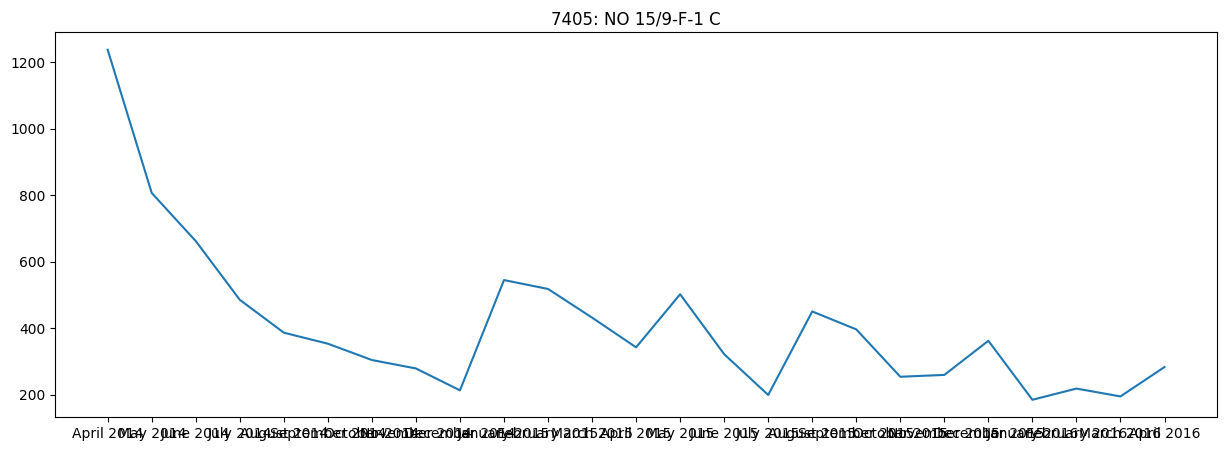

date
January 2014      436.510000
February 2014     326.709479
March 2014        271.249002
April 2014        245.313623
May 2014          232.858387
June 2014         236.735808
July 2014         223.754756
August 2014       203.604230
September 2014    196.158695
October 2014      187.402845
November 2014     189.391796
January 2015      202.838318
February 2015     168.982621
March 2015        146.145303
April 2015        141.997333
May 2015          132.049241
June 2015         122.377939
July 2015         127.118122
August 2015       309.216821
September 2015    247.494783
October 2015      204.953705
November 2015     208.098758
December 2015     221.467827
January 2016      194.075436
February 2016     176.495673
March 2016        161.924324
April 2016        182.080645
May 2016          166.443045
June 2016         137.960272
July 2016         143.518469
Name: oil_rate, dtype: float64


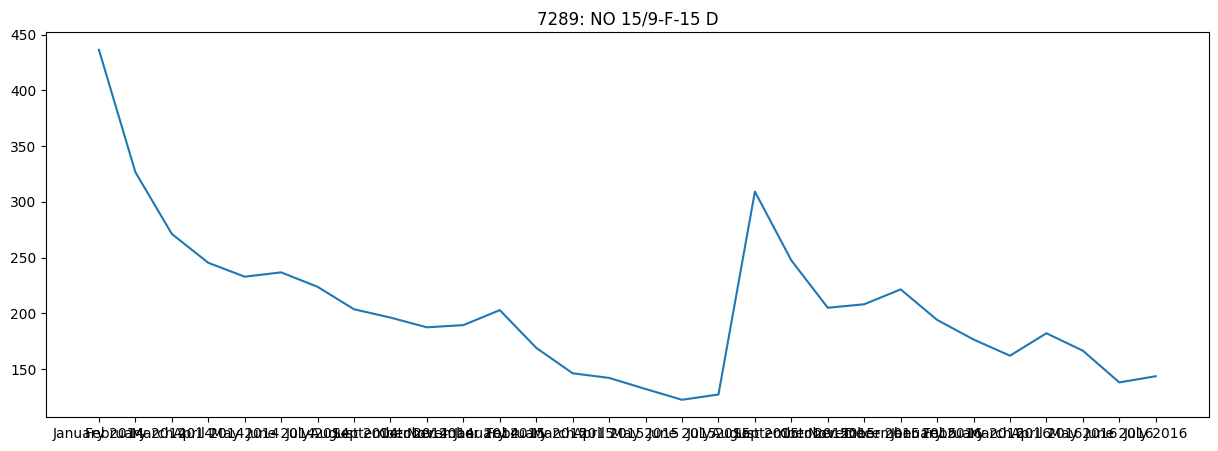

date
July 2013          854.807278
August 2013       1040.011159
September 2013    1015.707748
October 2013      1184.187780
November 2013     1191.670859
December 2013     1186.657974
January 2014      1237.312435
February 2014     1158.932815
March 2014        1175.651279
April 2014        1204.488583
May 2014          1139.487413
June 2014         1145.042971
July 2014         1091.061038
August 2014       1056.187361
September 2014    1144.837726
October 2014      1090.557961
November 2014      905.519000
December 2014      279.214120
January 2015       968.829218
February 2015      963.133138
March 2015        1429.629835
April 2015        1818.525333
May 2015          1775.136129
June 2015         1610.291844
July 2015         1412.408387
August 2015       1189.374380
September 2015    1049.003545
October 2015      1096.017267
November 2015     1301.280472
December 2015     1165.124201
January 2016      1029.296619
February 2016      895.481655
March 2016         808.197111
April

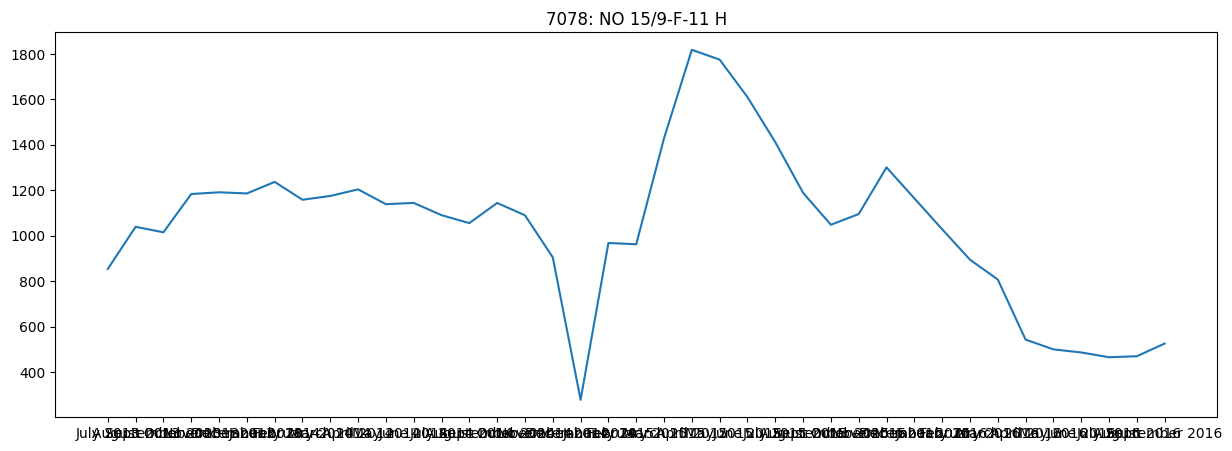

date
July 2008         2802.372582
August 2008       3448.961224
September 2008    4216.449595
October 2008      4614.771597
November 2008     3493.640197
December 2008     3554.815484
January 2009      3888.089466
February 2009     4195.819730
March 2009        3811.546424
April 2009        3678.630859
May 2009          4021.049114
June 2009         3018.441138
July 2009         2097.242431
August 2009       4039.606744
September 2009    4149.698224
October 2009      3446.558075
November 2009     3313.531608
December 2009     2953.187114
January 2010      2658.347829
February 2010     2421.583165
March 2010        2400.811368
April 2010        2568.141850
May 2010          2846.252124
June 2010         2517.534947
July 2010         2248.344802
August 2010       2160.943497
September 2010    2268.869563
October 2010      2543.307302
November 2010     2192.291512
December 2010     2067.379743
January 2011      1978.337097
February 2011     1871.215639
March 2011        1852.073756
April

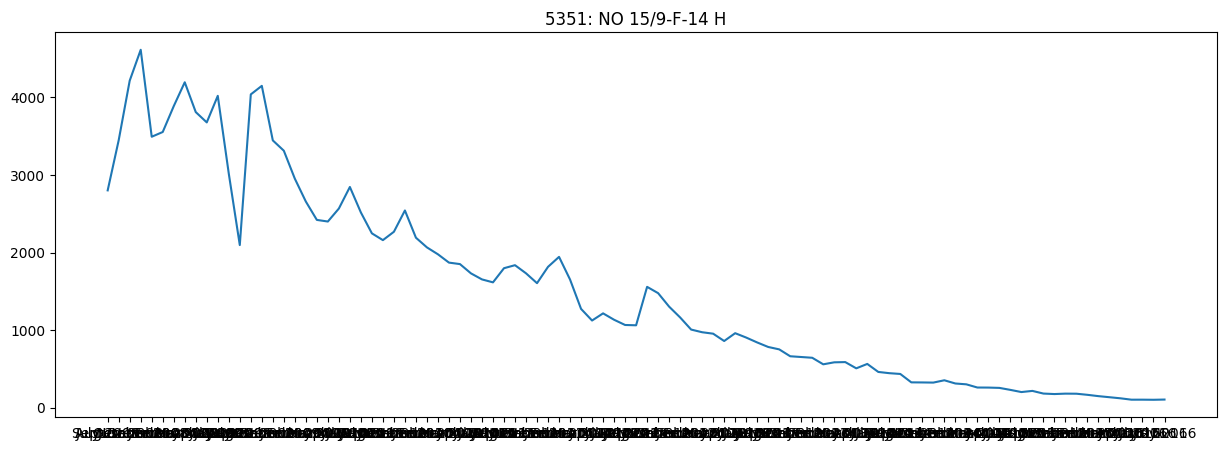

date
April 2016     314.162214
May 2016       313.190000
June 2016      304.692153
July 2016      319.383834
August 2016    345.351462
Name: oil_rate, dtype: float64


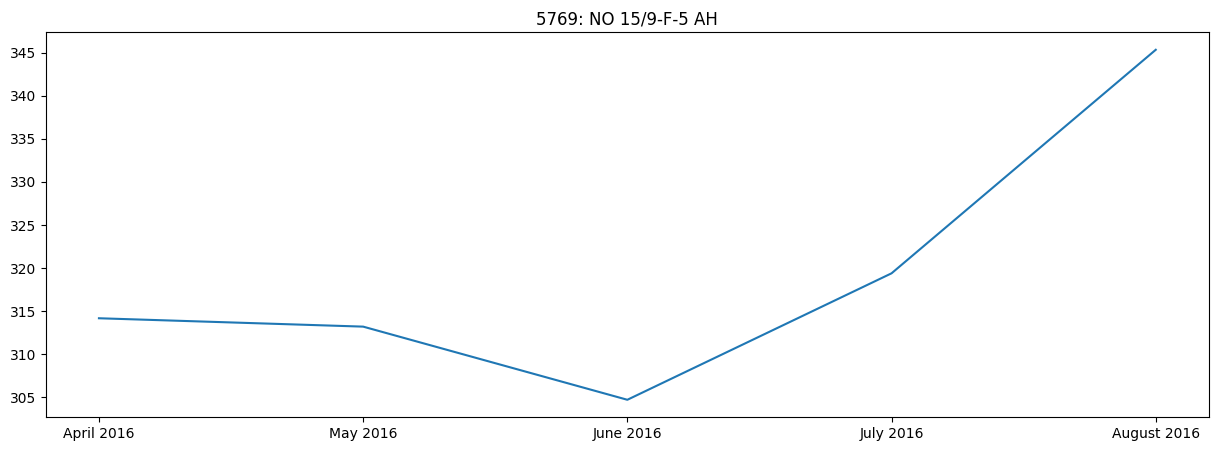

date
February 2008     2833.344928
March 2008        3009.010250
April 2008        2893.993682
May 2008          4206.944319
June 2008         5019.136185
July 2008         3877.461713
August 2008       3420.889511
September 2008    3193.614885
October 2008      3068.621810
November 2008     4907.843535
December 2008     5369.021613
January 2009      4977.790364
February 2009     4453.628675
March 2009        4254.553483
April 2009        5036.673930
May 2009          4847.413574
June 2009         4442.590714
July 2009         3430.242222
August 2009       4395.687307
September 2009    4234.136959
October 2009      4389.566382
November 2009     4626.156650
December 2009     5205.021154
January 2010      4837.997887
February 2010     4046.565879
March 2010        3776.089188
April 2010        2910.251269
May 2010          2521.461579
June 2010         2329.490628
July 2010         2070.464246
August 2010       1690.999094
September 2010    1854.194113
October 2010      1659.455677
Novem

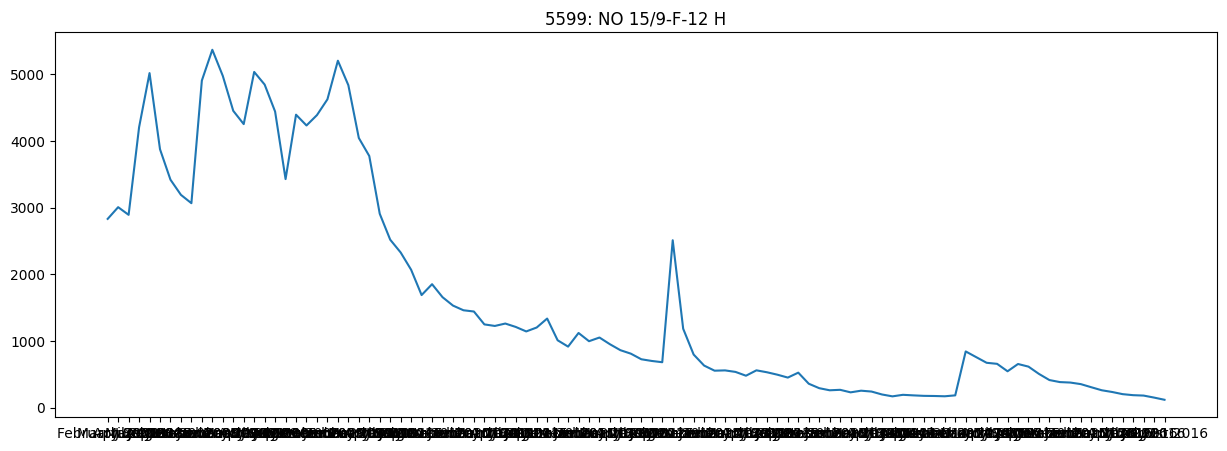

In [581]:
for i, j in well_info.items():
    well = df_active_producers[(df_active_producers.well_name==i)].reset_index()[['date', 'oil_rate']]
    # Group by month and year, and calculate the mean oil rate for each group
    monthly_avg = well.groupby(well['date'].dt.to_period('M')).mean()

    # Reset the index to have the date as a column
    # monthly_avg.reset_index(inplace=True)
    monthly_avg.index = monthly_avg.index.strftime('%B %Y')
    # monthly_avg = monthly_avg.drop('date')
    print(monthly_avg['oil_rate'])
    plt.figure(figsize=(15,5))
    plt.title(f'{i}: {j}')
    plt.plot(monthly_avg['oil_rate'])
    plt.show()

In [564]:
int(2836 * (5 / 100))

141

Notes: 
1. TRY to add outlier detection for massive gradient changes that wouldn't be picked up by z_score
2. Establish trends in time series stats
3. Fix axis in group monthly
4. Make more monthly groupings
5. Make document
6. Add choke size data to axis
